# Project 10: Chapter 8: Advanced Data Analysis

In [1]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

View the new dataframe by entering data in the console:

In [2]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [3]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

To call only the year values from the multi index, we use the dataframe method, *.get_level_values(“year”)*. This returns the same list, but with only years:

In [4]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order:

In [5]:
#multiIndex.py
# . . . 
# to gather all of the years, we group observations by year, 
# which will remove the other column of the multiindex 
years = data.groupby("year").mean().index

Once you understand the structure of the index, you may find it easier to call all of the commands in one line:

In [6]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

In [7]:
#multiIndex.py
# . . . 
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA","GBR", "ESP", "MEX")]
linestyles = ["-", ":","--","-."]

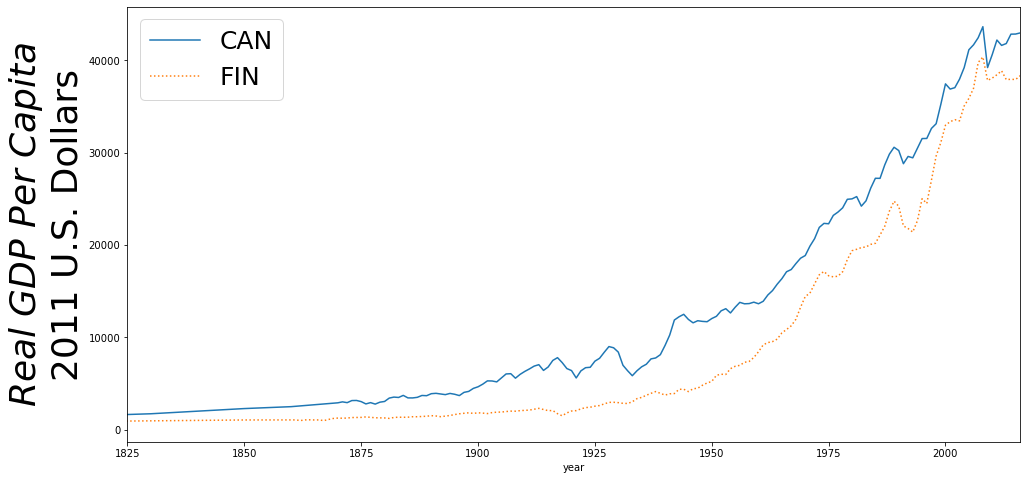

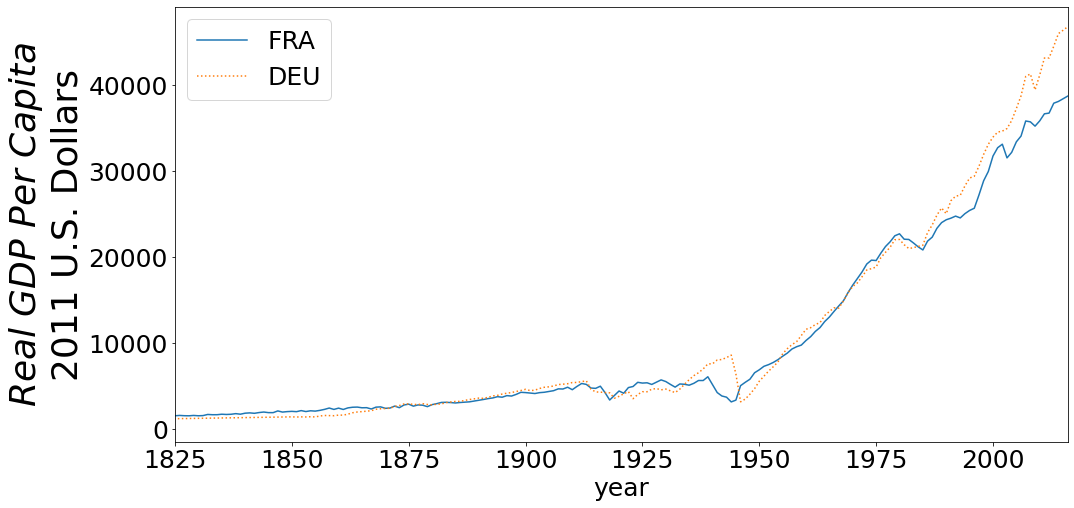

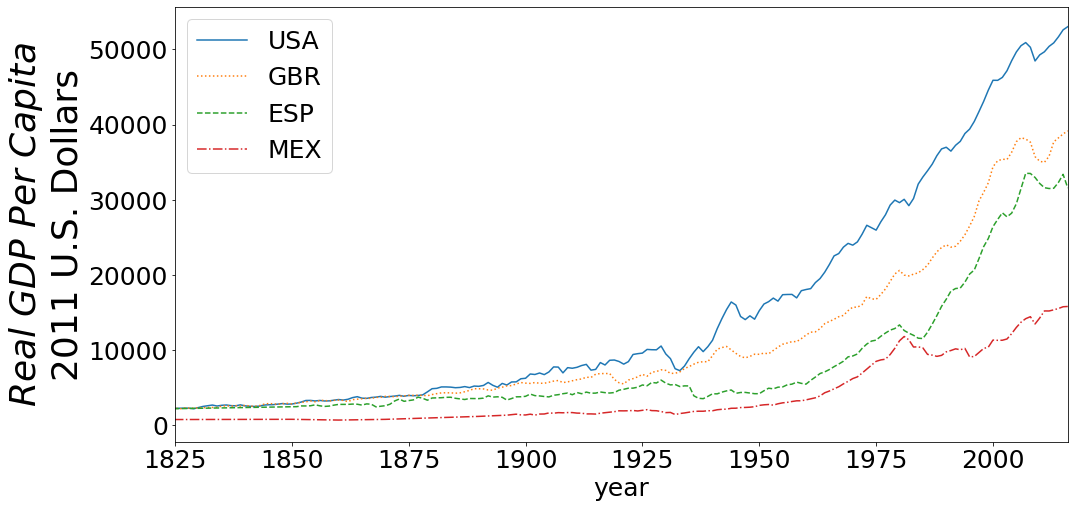

In [8]:
#multiIndex.py
# . . .
  
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()  

### Merge Data Sets with Double Index


In [9]:
#dataForPanel.py  
import pandas as pd  
 
#make sure dates are imported in the same format; to do this,  
#we turned off parse_dates  
fraser_data = pd.read_csv("cleanedEconFreedomData.csv",  
                           index_col = [0, 1], parse_dates=False)  
# drop any empty column and any empty row  
fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  
  
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])#, parse_dates = True)  


In [10]:
#dataForPanel.py
# . . . 
fraser_data["RGDP Per Capita"] = maddison_data["rgdpnapc"]
fraser_data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          10342.0  
         2015          10032.0  
         2014           9808.0  
         2013           9660.0  
...                        ...  
ZWE      2000           2249.0  
         1995           2156.0  
         1990           2232.0  
         1985           2198.0  
         1980           2133.0  

[3030 rows x 7 columns]

Now that the dataset has been transferred, we can save the result as a csv so that we can call it again in later examples. RGDP Per Capita is shown in the last column of the new csv file:

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

In [12]:
#indicatorVariable.py
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# Import data with "ISO_Code" and "Year" as index columns  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
  
# select "ISO_Code" from names of double index  
index_name = data.index.names[0]  
indicator_name = "North America"  
# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing   
# from Fraser Data  
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

Once the new column of data has been creative, it can be called by passing indicator¬¬_name to the dataframe. Be sure to use double brackets (i.e., *[[ , ]]*) so that the column names are included in the output. 

In [13]:
data[["North America"]]

North America
ISO_Code Year                     
ALB      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
...                            ...
ZWE      2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0

[3030 rows x 1 columns]

Text(0.5, 1.0, '2000')

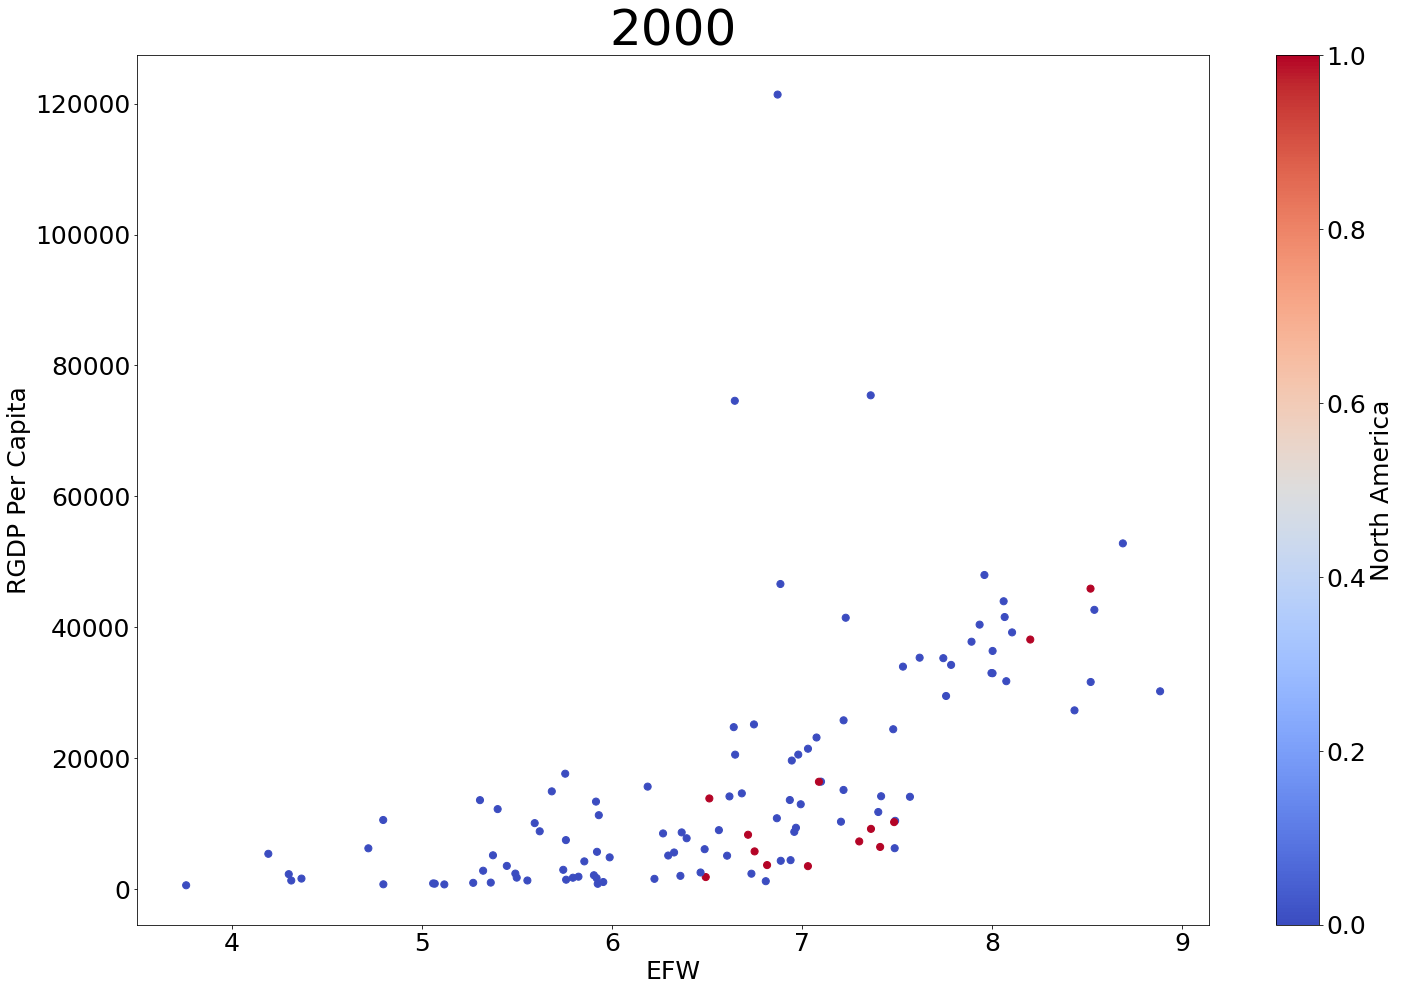

In [14]:
import datetime
year = 2000

plot_data = data[
    data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(
    x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

[0.  0.2 0.4 0.6 0.8 1. ]


<ipython-input-15-0b5121bf11b2>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

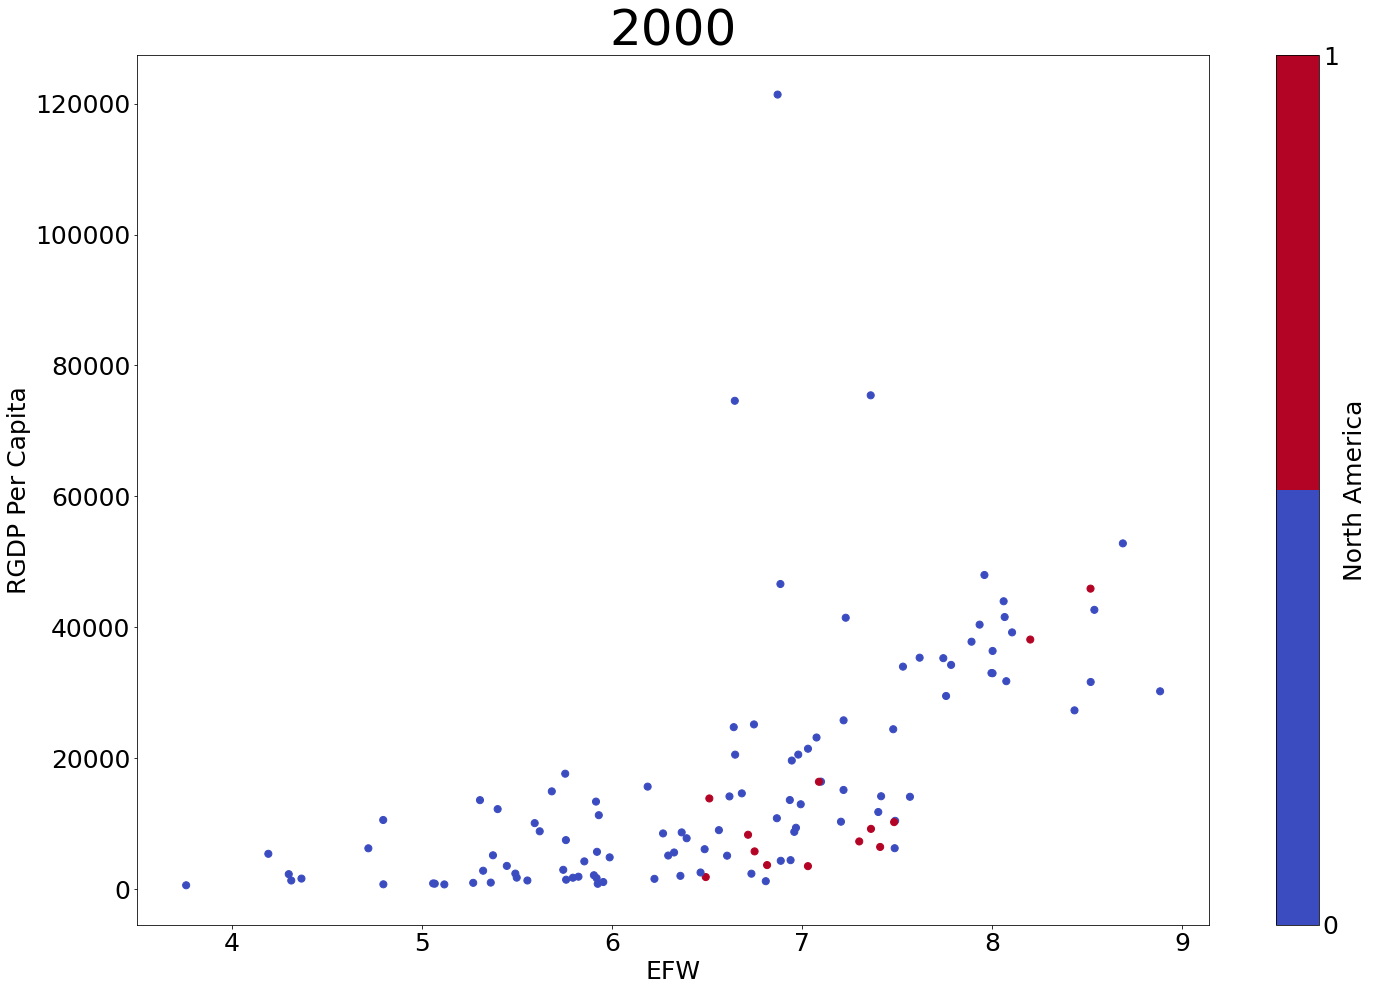

In [15]:
import datetime
from matplotlib import cm

year = 2000
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "North America",
                      cmap = cmap, ax = ax, norm = norm, s = 50)

# to remove numbers between 0 and 1, access the color axis through plt.gcf()
f = plt.gcf()
cax  = f.get_axes()[1]
# access colorbar values
vals = cax.get_yticks()
print(vals)
# only include 0 or 1
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# remove tick lines from color axis
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)

In [16]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions  
n = 5  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

In [17]:
#quantile.py  
import pandas as pd  
import numpy as np  
  
def create_quantile(n, 
                    data, 
                    year, 
                    quantile_var,
                    quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

# . . .
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

Now call "RGDP Per Capita" alongside the quantile rankings.

In [18]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code Year                                               
ALB      2017-01-01              NaN                     NaN
         2016-01-01          10342.0                     3.0
         2015-01-01          10032.0                     3.0
         2014-01-01           9808.0                     3.0
         2013-01-01           9660.0                     3.0
...                              ...                     ...
ZWE      2000-01-01           2249.0                     5.0
         1995-01-01           2156.0                     5.0
         1990-01-01           2232.0                     5.0
         1985-01-01           2198.0                     5.0
         1980-01-01           2133.0                     5.0

[3030 rows x 2 columns]

C:\Users\JLCat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

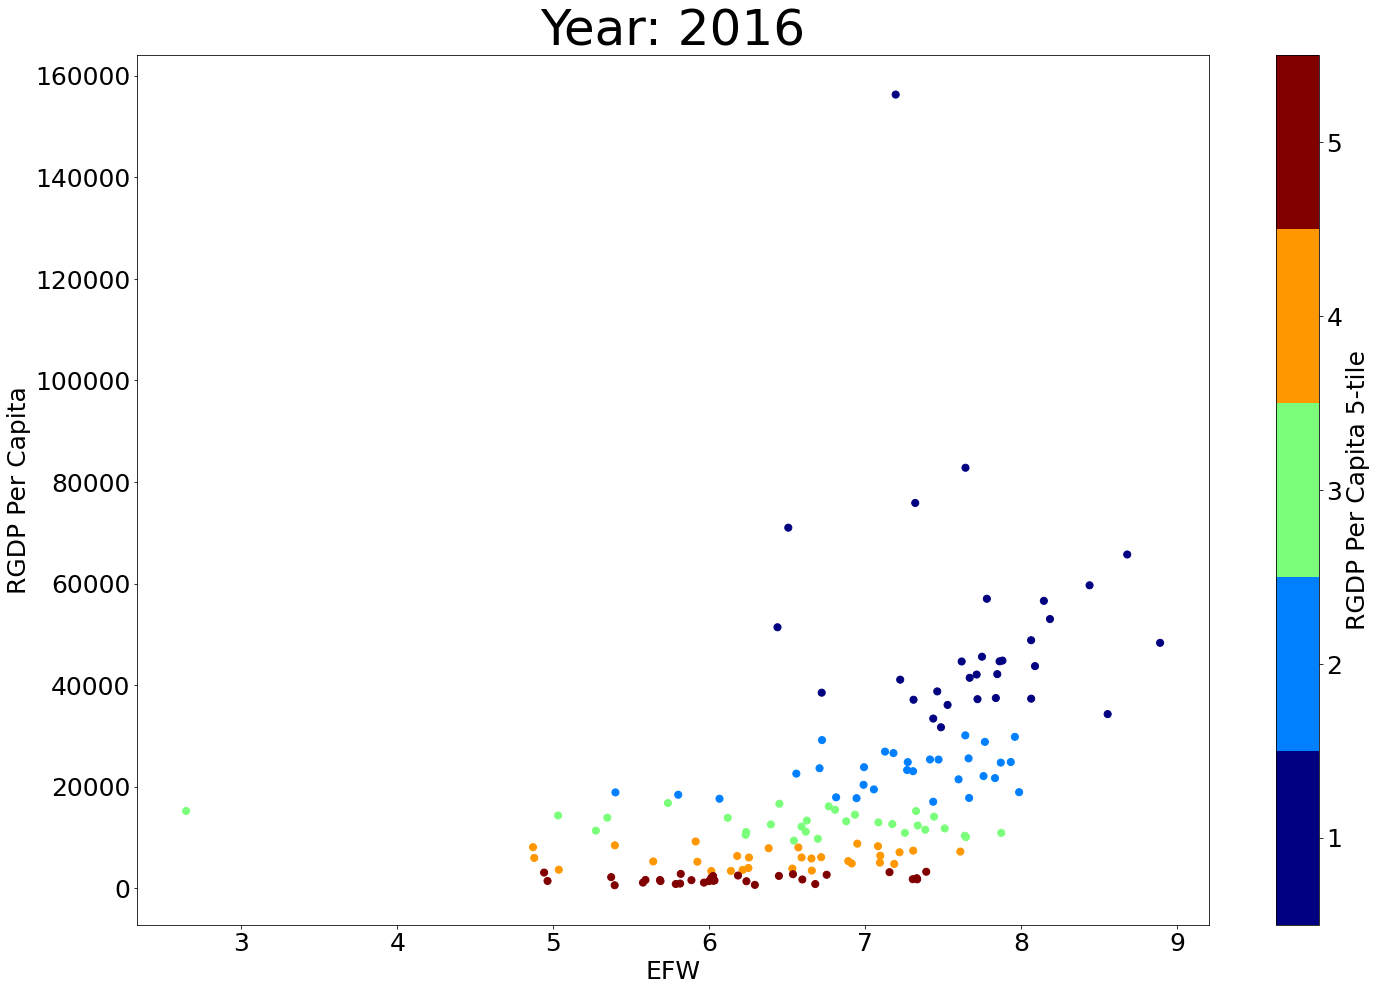

In [19]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 5 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", 
                       y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, 
                       norm = norm, 
                       ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values


In [20]:
#logAndDifferenceData.py  
import pandas as pd  
import numpy as np  
import datetime  
  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)


To understand what the command yielded, we will want to view data for an individual country. The following command will save *“RGDP Per Capita”* in the United States and the lag of that value to a csv file:

In [21]:
data.loc["USA", :]

EFW  Size of Government  Legal System & Property Rights  \
Year                                                                       
2017-01-01  8.196365            7.157599                        7.436473   
2016-01-01  8.183442            7.138582                        7.396209   
2015-01-01  8.085664            7.121655                        7.226306   
2014-01-01  7.969703            7.126057                        7.099625   
2013-01-01  7.900998            7.097752                        6.974508   
2012-01-01  8.012288            7.565472                        7.016540   
2011-01-01  7.906265            7.260760                        6.957723   
2010-01-01  7.972577            7.108888                        7.143095   
2009-01-01  7.965853            7.147290                        7.188374   
2008-01-01  8.244885            7.496386                        7.409211   
2007-01-01  8.394524            7.790872                        7.447685   
2006-01-01  8.318497            7.701156                        7.360503   
2005-01-01  8.353783            7.706034                        7.540888   
2004-01-01  8.443225            7.717933                        7.767612   
2003-01-01  8.454976            7.830378                        7.803444   
2002-01-01  8.457409            7.642580                        7.924788   
2001-01-01  8.410677            7.429561                        8.179702   
2000-01-01  8.518073            7.376862                        8.472453   
1995-01-01  8.341947            7.212638                        8.042995   
1990-01-01  8.243760            7.297623                        7.662116   
1985-01-01  7.953914            6.227951                        7.661198   
1980-01-01  7.770014            5.327910                        7.660280   
1975-01-01  7.586137            5.237192                        7.258934   
1970-01-01  7.450927            5.428116                        7.658394   

            Sound Money  Freedom to trade internationally  Regulation  \
Year                                                                    
2017-01-01     9.799038                          7.674580    8.914133   
2016-01-01     9.847874                          7.653328    8.881217   
2015-01-01     9.761051                          7.535949    8.783357   
2014-01-01     9.389649                          7.573566    8.659619   
2013-01-01     9.420297                          7.374713    8.637721   
2012-01-01     9.323542                          7.699527    8.456360   
2011-01-01     9.305630                          7.711284    8.295927   
2010-01-01     9.678239                          7.720760    8.211905   
2009-01-01     9.604751                          7.723552    8.165299   
2008-01-01     9.686262                          7.998733    8.633830   
2007-01-01     9.735613                          8.114240    8.884209   
2006-01-01     9.655075                          8.079715    8.796037   
2005-01-01     9.758164                          8.063767    8.700063   
2004-01-01     9.727209                          8.194439    8.808933   
2003-01-01     9.815523                          8.142189    8.683346   
2002-01-01     9.801028                          8.114732    8.803917   
2001-01-01     9.733911                          8.327207    8.383006   
2000-01-01     9.777079                          8.399517    8.564456   
1995-01-01     9.759442                          8.439737    8.297538   
1990-01-01     9.673185                          8.381256    8.237404   
1985-01-01     9.357104                          8.347065    8.098006   
1980-01-01     9.218317                          8.386655    8.120619   
1975-01-01     9.253650                          8.250651    7.811275   
1970-01-01     9.582725                          8.066407    6.438019   

            RGDP Per Capita  RGDP Per Capita Lag  
Year                                              
2017-01-01              NaN            

In [22]:
data.index.get_level_values("Year")

DatetimeIndex(['2017-01-01', '2016-01-01', '2015-01-01', '2014-01-01',
               '2013-01-01', '2012-01-01', '2011-01-01', '2010-01-01',
               '2009-01-01', '2008-01-01',
               ...
               '2005-01-01', '2004-01-01', '2003-01-01', '2002-01-01',
               '2001-01-01', '2000-01-01', '1995-01-01', '1990-01-01',
               '1985-01-01', '1980-01-01'],
              dtype='datetime64[ns]', name='Year', length=3030, freq=None)

If we compare these values to the critierion specified, a column of boolean values will be generated that identifies where values from the index meet the specified criterion.

In [23]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

If we pass the command, *data.index.get_level_values("Year") > datetime.datetime(1999,1,1)*, to the dataframe, only observations that meet the criterion indicated will be included. In this case, any observation generated in years after 1999 will be included.

In [24]:
#logAndDifferenceData.py
# . . .
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

Call *data* in the console to see that the range of dates included has narrowed, thereby removing the observations separated by 5 year intervals:

In [25]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
ALB      2017-01-01              NaN              10342.0  
         2016-01-01          10342.0              10032.0  
         2015-01-01          10032.0               9808.0  
         2014-01-01           9808.0               9660.0  
         2013-01-01           9660.0               9592.0  
...                              ...                  ...  
ZWE      2004-01-01           1622.0               1722.0  
         2003-01-01           1722.0               2054.0  
         2002-01-01           2054.0               2228.0  
         2001-01-01           2228.0               2249.0  
         2000-01-01           2249.0               2156.0  

[2589 rows x 8 columns]

The earliest dates included nowonly reach as far back as the year 2001. 

Now that we’ve delimited the data, let’s perform some other transformation that will help to prepare the data for a regression. It will be useful to log GDP values as the rate of growth of GDP measured in raw units tends to increase over time. By logging data, beta estimates will approximate the cross elasticity of the endogenous variable y with respect to a change in an exogenous variable x.

Since we have already created a lagged measure of real GDP, this is a good opportunitiy to use a for loop. We only want to log values referred to be a key that includes the string *“GDP”*. We check each key for inclusion of this term. If the term is included in the key, than we add a logged version of the variable. 


In [26]:
#logAndDifferenceData.py
# . . . 
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

In [27]:
#logAndDifferenceData.py
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

Now let's check the data that we saved as data_dict["Diff Data"]

In [28]:
data_dict["Data"]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2017-01-01              NaN              10342.0   
         2016-01-01          10342.0              10032.0   
         2015-01-01          10032.0               9808.0   
         2014-01-01           9808.0               9660.0   
         2013-01-01           9660.0               9592.0   
...                              ...                  ...   
ZWE      2004-01-01           1622.0               1722.0   
         2003-01-01           1722.0               2054.0   
         2002-01-01           2054.0               2228.0   
         2001-01-01           2228.0               2249.0   
         2000-01-01           2249.0               2156.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  
ISO_Code Year                                                      
ALB      2017-01-01                  NaN                 9.243969  
         2016-01-01             9.243969                 9.213535  
         2015-01-01             9.213535                 9.190954  
         2014-01-01             9.190954                 9.175749  
         2013-01-01             9.175749                 9.168685  
...                                  ...                      ...  
ZWE      2004-01-01             7.391415                 7.451242  
         2003-01-01             7.451242                 7.627544  
         2002-01-01             7.627544                 7.708860  
         20

Notice that there exist no data for the first year of observations. Without a previous year to draw from for the year 1999, the pandas dataframe is left blank for differenced values in this year.

### Using Indicator Variables in Regression

In [29]:
#indicatorAndDiffRegression.py
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True) 
 
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
keys = data.keys()
for key in keys:  
    if "GDP" in key:  
        data[key + " Lag"] = data[key].groupby("ISO_Code").shift()
        data["Log " + key] = np.log(data[key])  
        data["Log " + key + " Lag"] = data["Log " + key].groupby("ISO_Code").shift()
        
        
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff().dropna().index  
data_dict = {}  
data_dict["Data"] = data  

data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby("ISO_Code").diff() 
data_dict["Diff Data"].dropna(inplace = True)  
  
# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

In [30]:
data_dict[key]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


In [31]:
data_dict[key].dropna()

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2014-01-01 -0.052896           -0.022220   
         2013-01-01 -0.197245           -0.074133   
         2012-01-01 -0.057193            0.288471   
         2011-01-01  0.048732           -0.275409   
         2010-01-01 -0.000338            0.018699   
...                       ...                 ...   
ZWE      2005-01-01 -0.123308           -0.479647   
         2004-01-01  0.291817            0.893369   
         2003-01-01  0.494203            0.524706   
         2002-01-01 -0.049776           -0.194706   
         2001-01-01  0.008006            0.032941   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2014-01-01                       -0.336748     0.043694   
         2013-01-01                       -0.122958     0.061623   
         2012-01-01                       -0.072290     0.019798   
         2011-01-01                        0.403390     0.064519   
         2010-01-01                        0.380981    -0.050237   
...                                             ...          ...   
ZWE      2005-01-01                       -0.085038     0.000000   
         2004-01-01                        0.108099     0.000000   
         2003-01-01                       -0.174357     1.250000   
         2002-01-01                       -0.016127     0.000000   
         2001-01-01                       -0.094124     0.452366   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2014-01-01                          0.099512   -0.048719   
         2013-01-01                         -0.502859   -0.347895   
         2012-01-01                         -0.590349    0.068405   
         2011-01-01                          0.003521    0.047639   
         2010-01-01                          0.127981   -0.479114   
...                                               ...         ...   
ZWE      2005-01-01                          0.069345   -0.121200   
         2004-01-01                          0.199055    0.258565   
         2003-01-01                          0.552497    0.318168   
         2002-01-01                         -0.117556    0.079507   
         2001-01-01                          0.182173   -0.533328   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2014-01-01           -224.0               -310.0   
         2013-01-01           -148.0               -224.0   
         2012-01-01            -68.0               -148.0   
         2011-01-01           -108.0                -68.0   
         2010-01-01           -212.0               -108.0   
...                              ...                  ...   
ZWE      2005-01-01             43.0                 36.0   
         2004-01-01            112.0                 43.0   
         2003-01-01            100.0                112.0   
         2002-01-01            332.0                100.0   
         2001-01-01            174.0                332.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2014-01-01            -0.022582                -0.030433   
         2013-01-01            -0.015205                -0.022582   
         2012-01-01            -0.007064                -0.015205   
         2011-01-01            -0.011323                -0.007064   
         2010-01-01            -0.022607                -0.011323   
...                                  ...                      ...   
ZWE      2005-01-01             0.028890                 0.024846   
         2004-01-01             0.071550                 0.028890   
         2003-01-01             0.059826                 0.071550   


In [32]:
#indicatorRegressoin.py
# . . . 
import statsmodels.api as sm
# . . . 
# prepare regression variables  
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  

# save instance of regression class  
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 8.073e+05
Date:                 Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                         08:51:21   Log-Likelihood:                 3475.9
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2028   BIC:                            -6929.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-32-bcbc3e003562>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-32-bcbc3e003562>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


We can check if the indicator variable, *“North America”*, adds any explanatory value by adding the variable to this regression. Only line 43 is changed by this addition.

In [33]:
# . . .
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]
# . . .
for key in data_dict:  
    reg_data = data_dict[key].dropna()
    X = reg_data[X_names]
    X["Constant"] = 1
    Y = reg_data[y_name]    # call OLS method  
    print(key)
    data = data_dict[key]  
    results = sm.OLS(Y, X).fit()  
    print(results.summary())

Data
                             OLS Regression Results                            
Dep. Variable:     Log RGDP Per Capita   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 5.385e+05
Date:                 Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                         08:51:21   Log-Likelihood:                 3477.0
No. Observations:                 2031   AIC:                            -6946.
Df Residuals:                     2027   BIC:                            -6923.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
EFW        

<ipython-input-33-d39adbaf43ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-33-d39adbaf43ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [34]:
!pip install linearmodels

After installation, run the regression from Project 8 to see if the fit of the regression is improved. 

In [35]:
data_dict

{'Data':                           EFW  Size of Government  \
 ISO_Code Year                                       
 ALB      2017-01-01  7.673511            7.528167   
          2016-01-01  7.637742            7.875862   
          2015-01-01  7.639666            7.904257   
          2014-01-01  7.586769            7.882037   
          2013-01-01  7.389525            7.807904   
 ...                       ...                 ...   
 ZWE      2005-01-01  2.889240            4.291101   
          2004-01-01  3.181057            5.184469   
          2003-01-01  3.675260            5.709175   
          2002-01-01  3.625483            5.514469   
          2001-01-01  3.633489            5.547411   
 
                      Legal System & Property Rights  Sound Money  \
 ISO_Code Year                                                      
 ALB      2017-01-01                        5.064907     9.648271   
          2016-01-01                        5.071814     9.553657   
          20

Data
Entity = True
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0708
Estimator:                    PanelOLS   R-squared (Between):              0.1185
No. Observations:                 2031   R-squared (Within):               0.1328
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.1279
Time:                         08:51:31   Log-likelihood                    1908.3
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      28.386
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust):

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-36-917615f6d777>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-36-917615f6d777>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

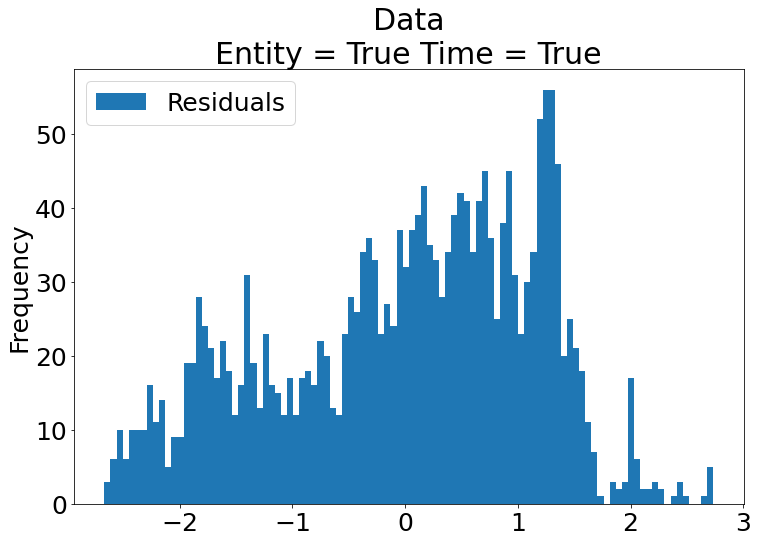

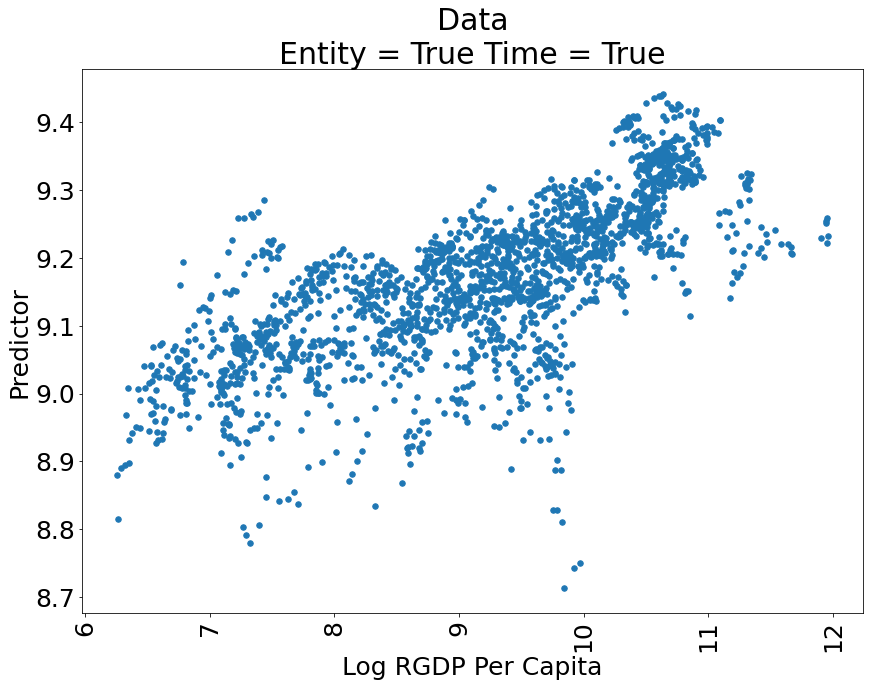

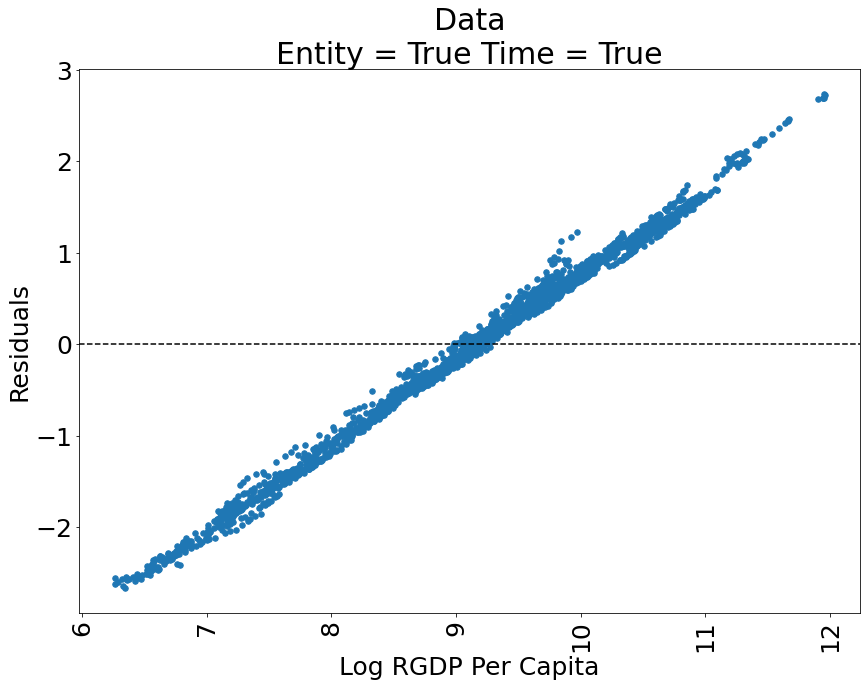

Data
Entity = True
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.2108
Estimator:                    PanelOLS   R-squared (Between):              0.2018
No. Observations:                 2031   R-squared (Within):               0.2108
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.2179
Time:                         08:51:32   Log-likelihood                    1397.6
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      100.26
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,1877)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-36-917615f6d777>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-36-917615f6d777>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

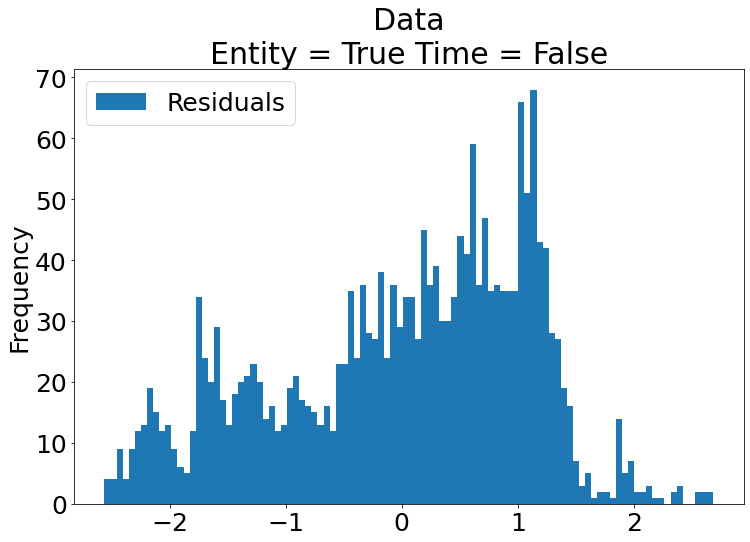

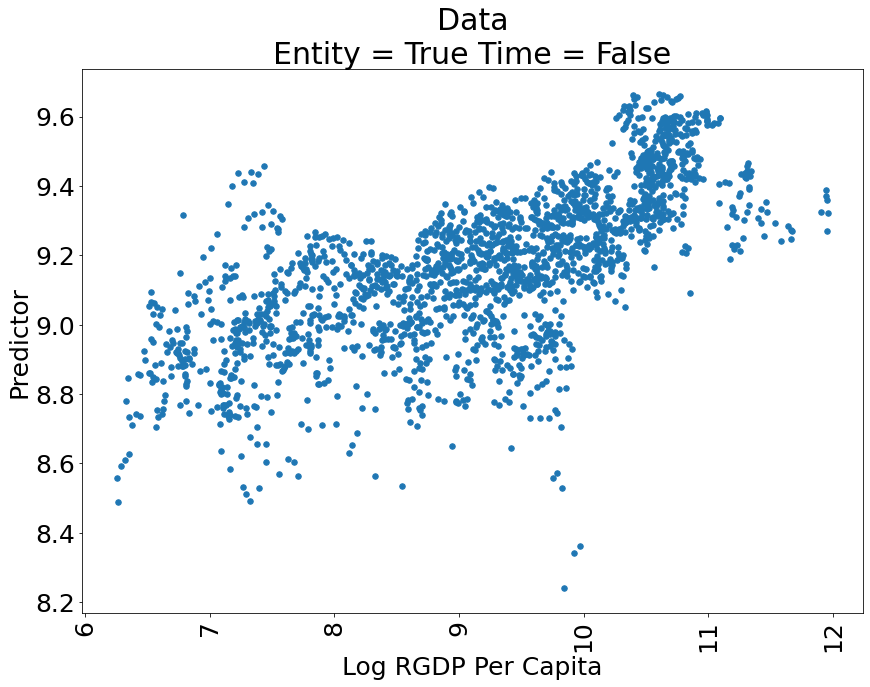

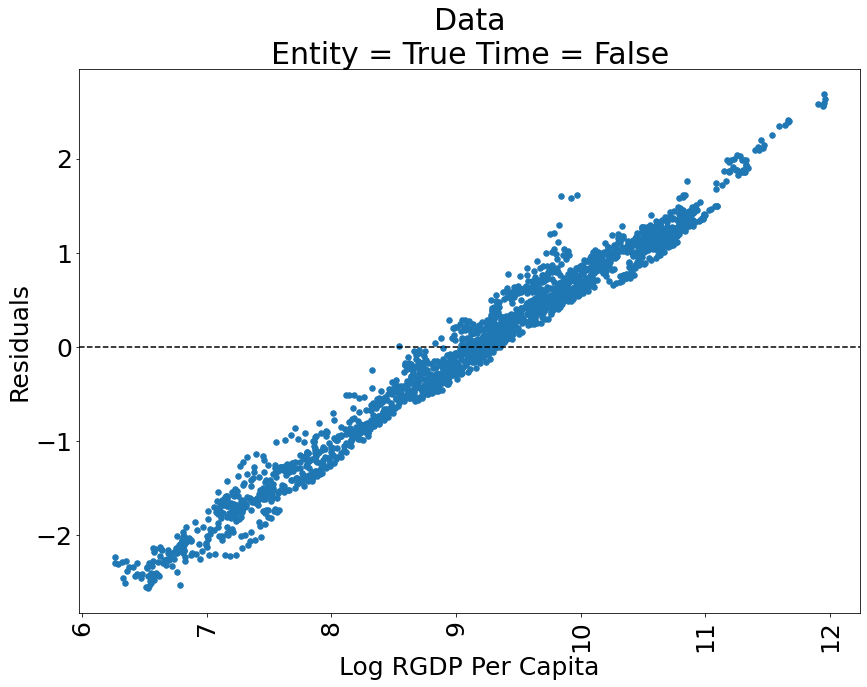

Data
Entity = False
Time = True
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6156
Estimator:                    PanelOLS   R-squared (Between):              0.6172
No. Observations:                 2031   R-squared (Within):              -1.5357
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.6145
Time:                         08:51:33   Log-likelihood                   -2335.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      643.99
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2011)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust)

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-36-917615f6d777>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-36-917615f6d777>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

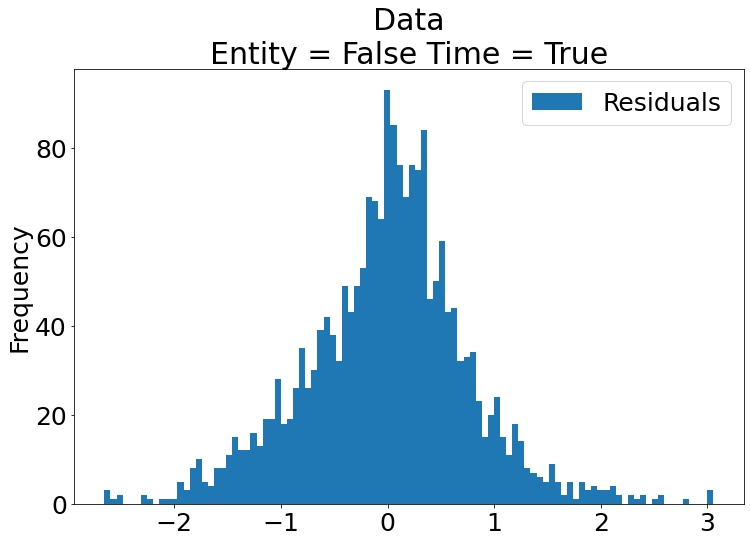

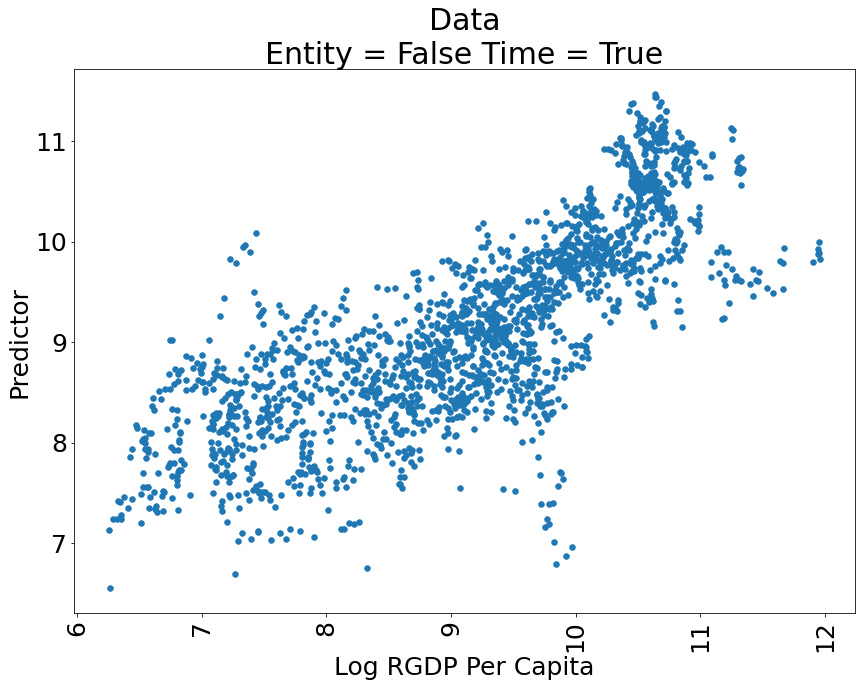

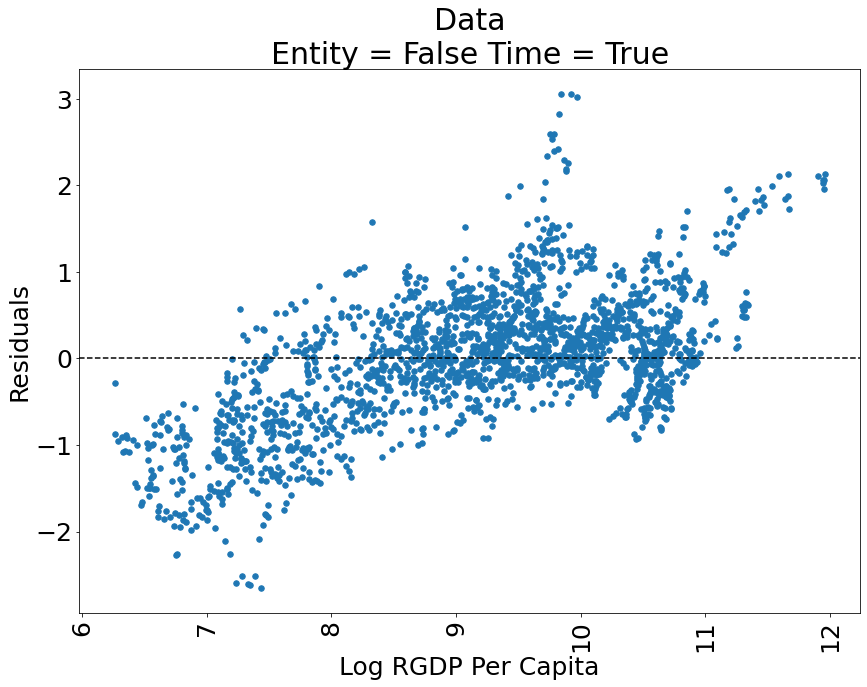

Data
Entity = False
Time = False
Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.6146
Estimator:                    PanelOLS   R-squared (Between):              0.6167
No. Observations:                 2031   R-squared (Within):              -1.4914
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.6146
Time:                         08:51:34   Log-likelihood                   -2340.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      645.80
Entities:                          162   P-value                           0.0000
Avg Obs:                        12.537   Distribution:                  F(5,2025)
Min Obs:                        0.0000                                           
Max Obs:                        15.000   F-statistic (robust

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
<ipython-input-36-917615f6d777>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-36-917615f6d777>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

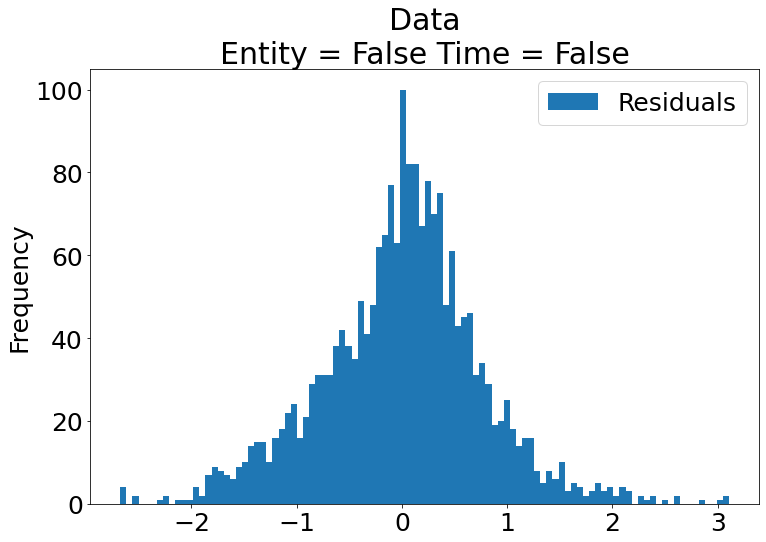

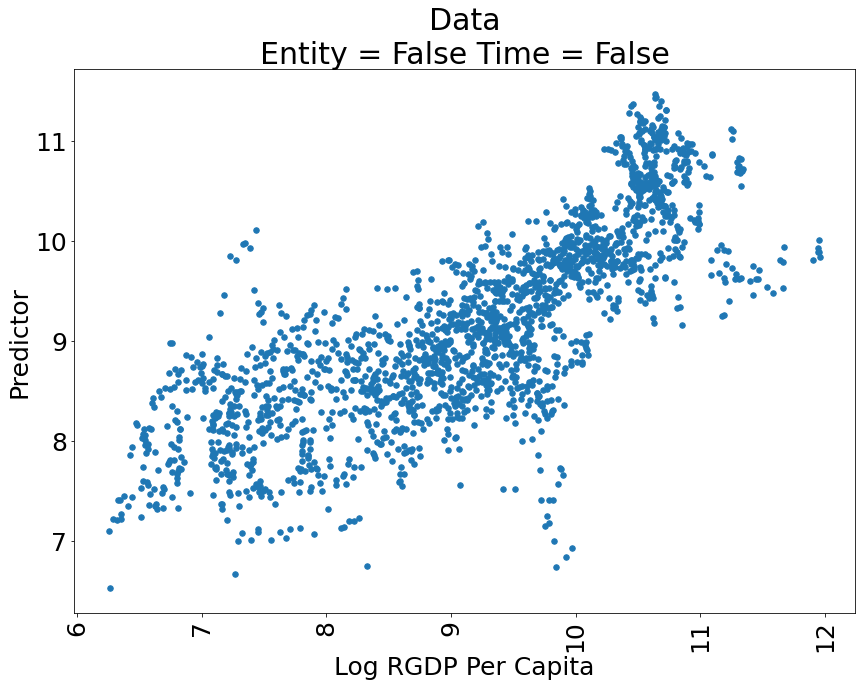

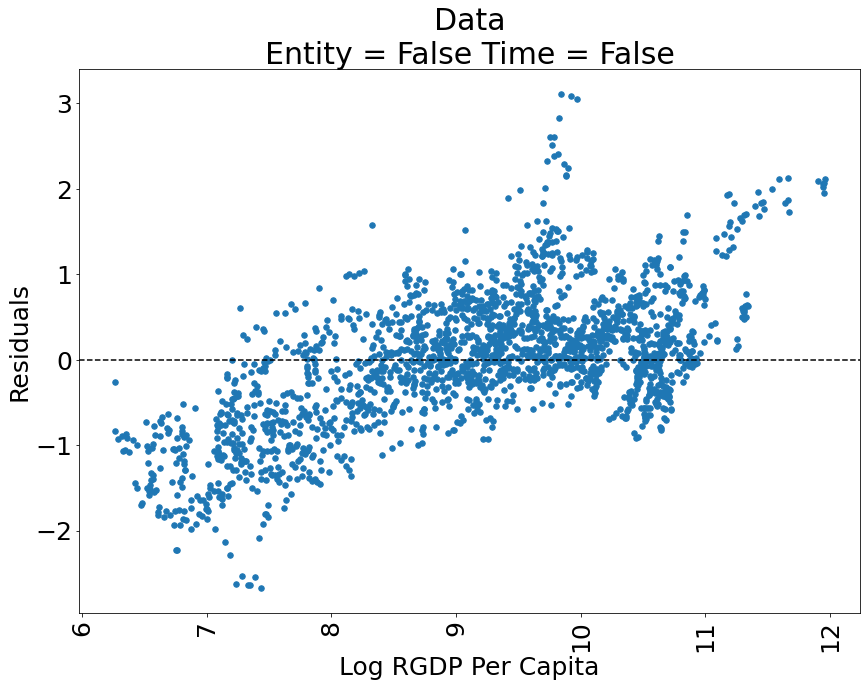

Diff Data
Entity = True
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0192
Estimator:                    PanelOLS   R-squared (Between):              0.0021
No. Observations:                 1882   R-squared (Within):               0.0177
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.0198
Time:                         08:51:35   Log-likelihood                    3701.2
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      6.7241
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1715)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statistic

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


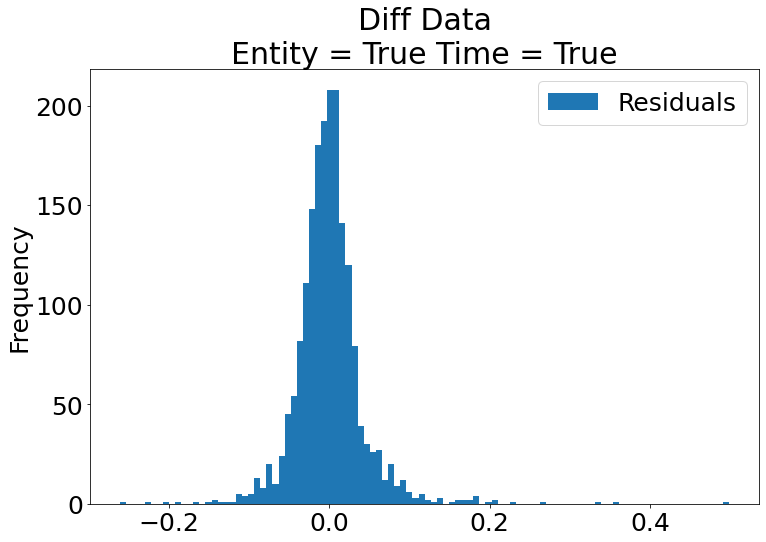

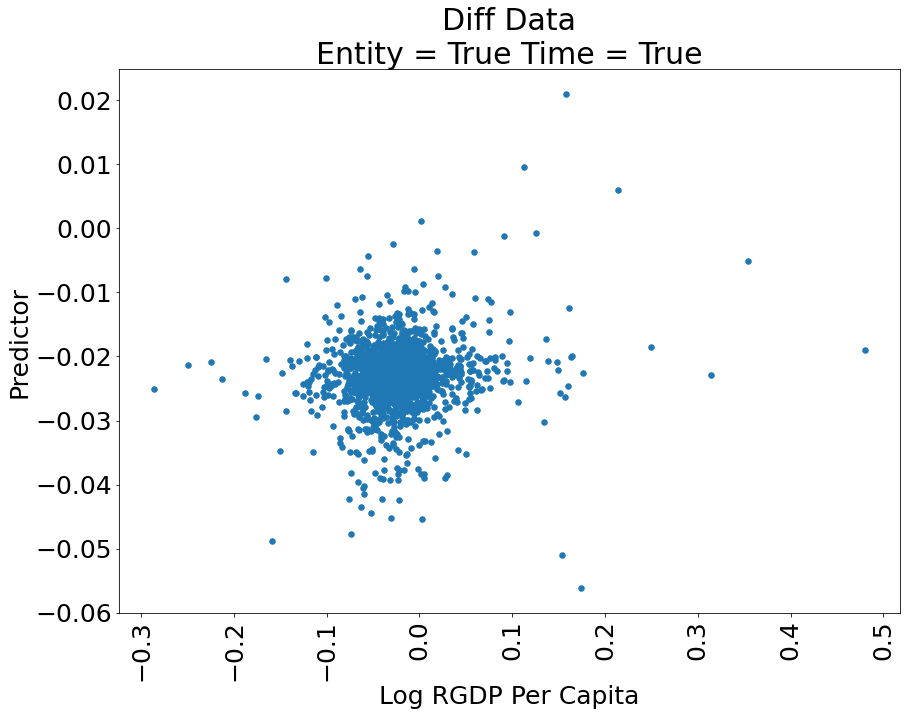

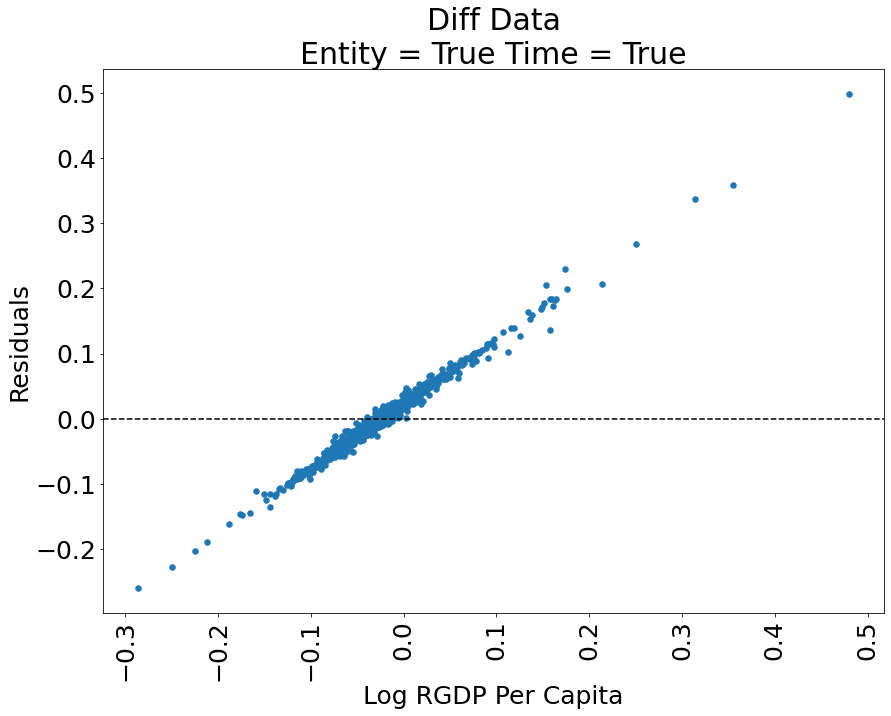

Diff Data
Entity = True
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0232
Estimator:                    PanelOLS   R-squared (Between):              0.0127
No. Observations:                 1882   R-squared (Within):               0.0232
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.0255
Time:                         08:51:36   Log-likelihood                    3531.4
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.2208
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1728)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


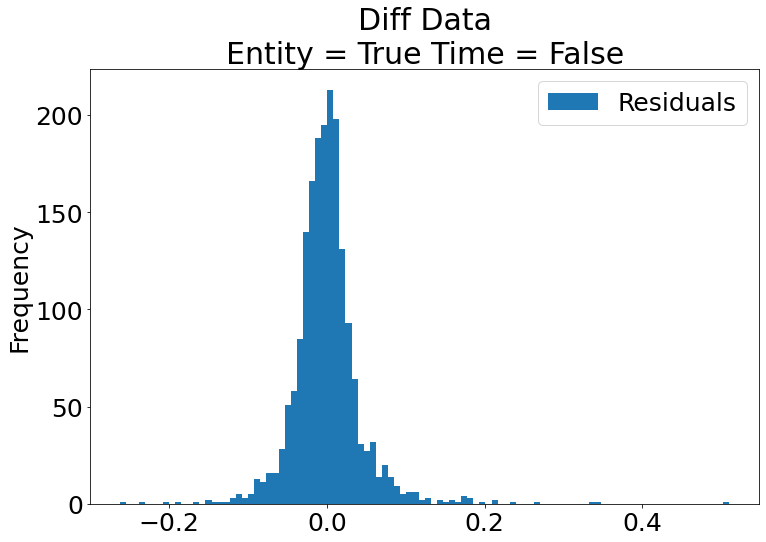

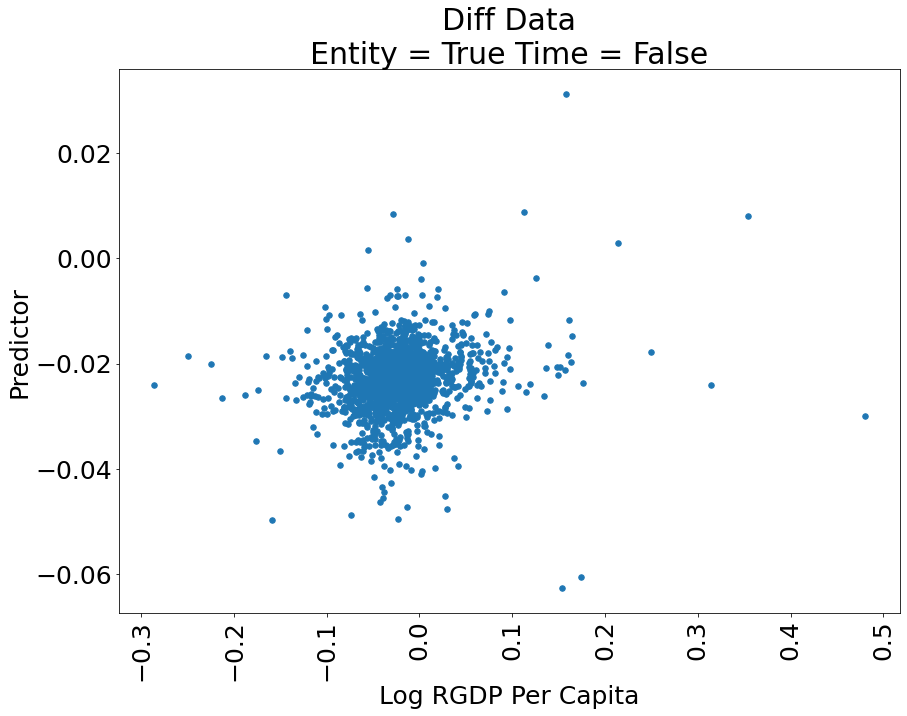

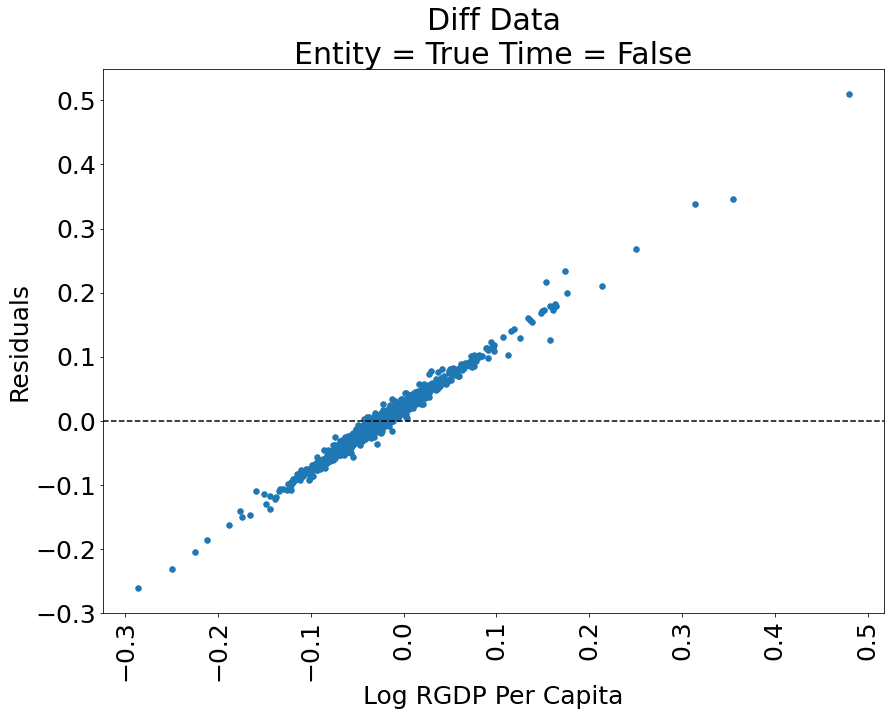

Diff Data
Entity = False
Time = True
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0231
Estimator:                    PanelOLS   R-squared (Between):              0.0161
No. Observations:                 1882   R-squared (Within):               0.0184
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.0236
Time:                         08:51:37   Log-likelihood                    3339.5
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      8.8245
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1863)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statisti

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


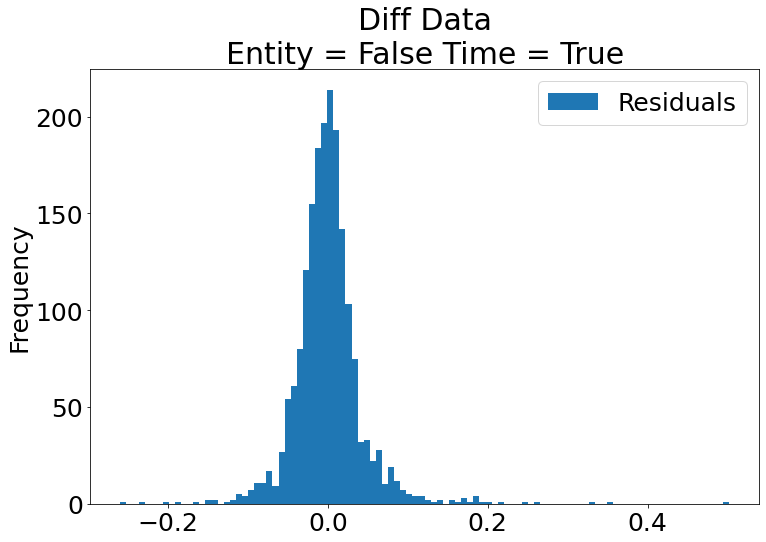

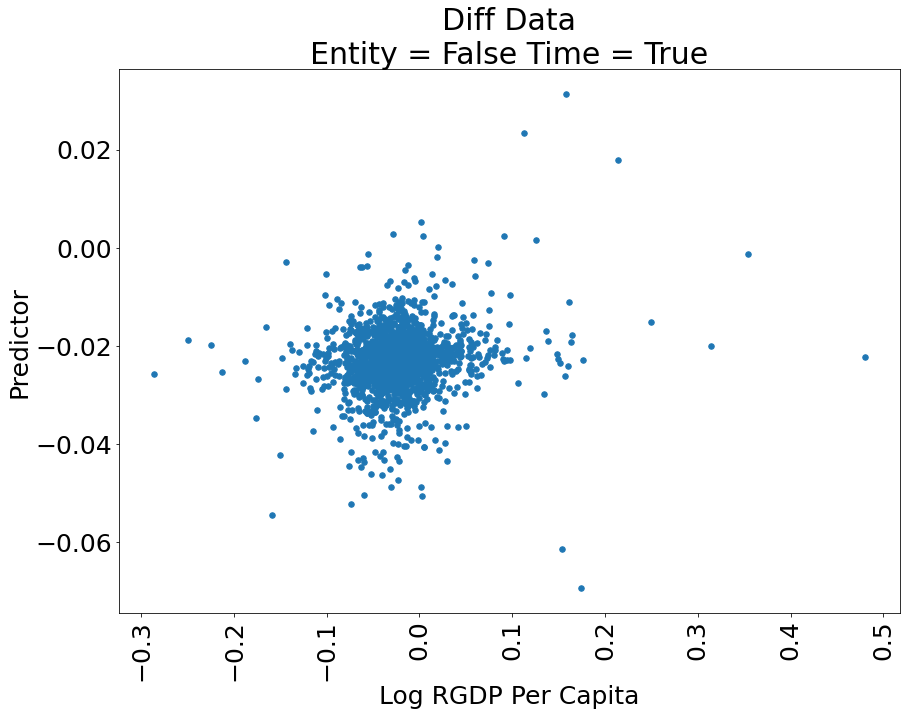

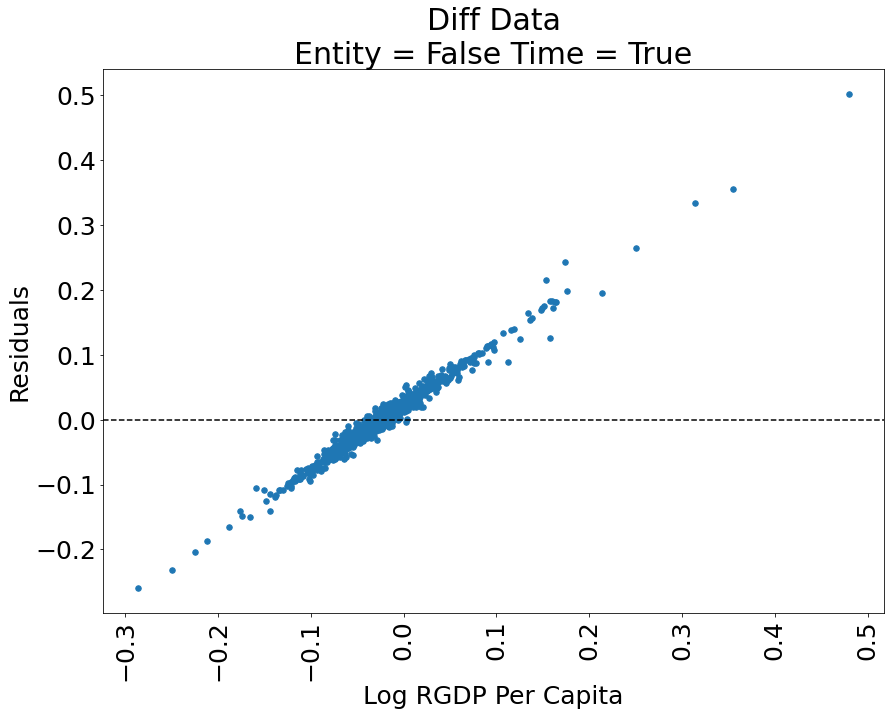

Diff Data
Entity = False
Time = False
Diff Data
                           PanelOLS Estimation Summary                           
Dep. Variable:     Log RGDP Per Capita   R-squared:                        0.0271
Estimator:                    PanelOLS   R-squared (Between):              0.0262
No. Observations:                 1882   R-squared (Within):               0.0212
Date:                 Tue, Nov 09 2021   R-squared (Overall):              0.0271
Time:                         08:51:38   Log-likelihood                    3220.9
Cov. Estimator:              Clustered                                           
                                         F-statistic:                      10.447
Entities:                          162   P-value                           0.0000
Avg Obs:                        11.617   Distribution:                  F(5,1876)
Min Obs:                        0.0000                                           
Max Obs:                        14.000   F-statist

<ipython-input-36-917615f6d777>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


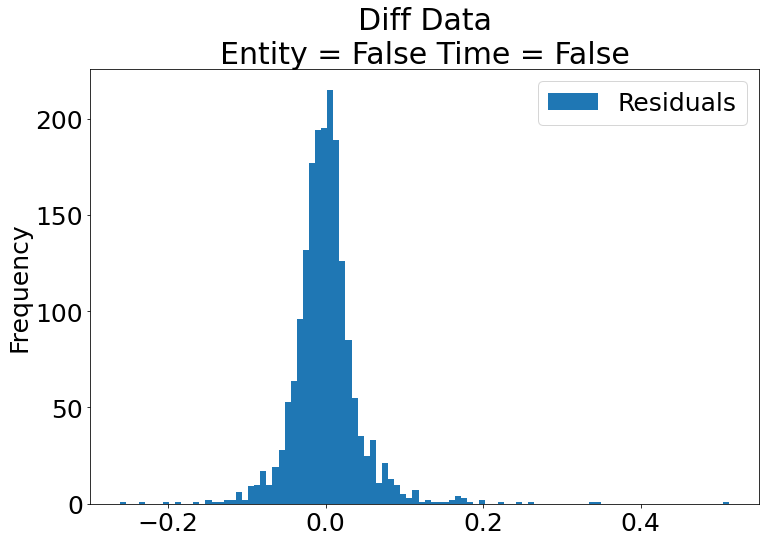

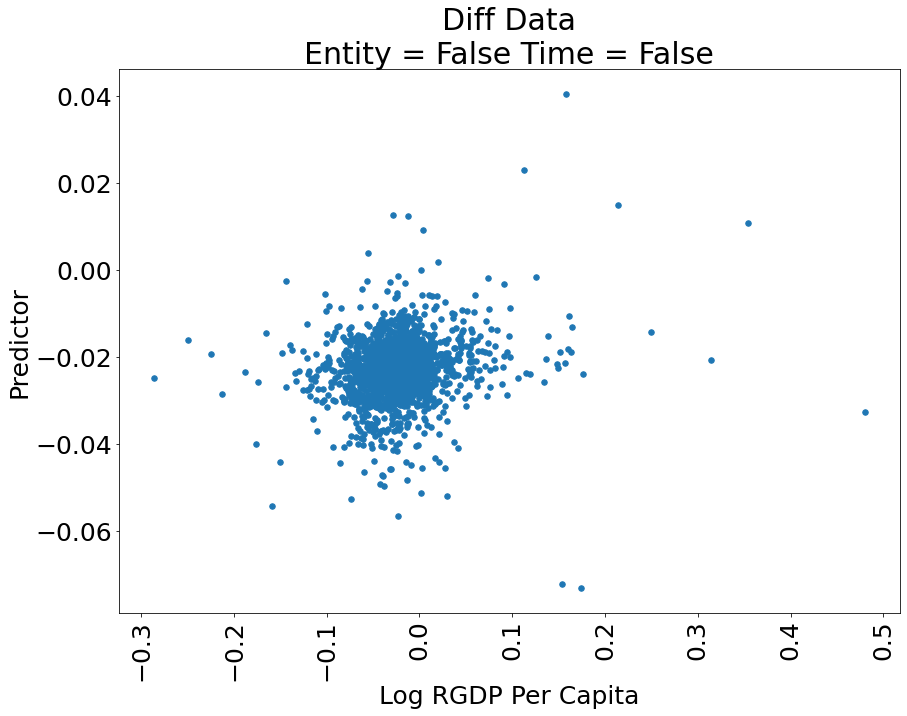

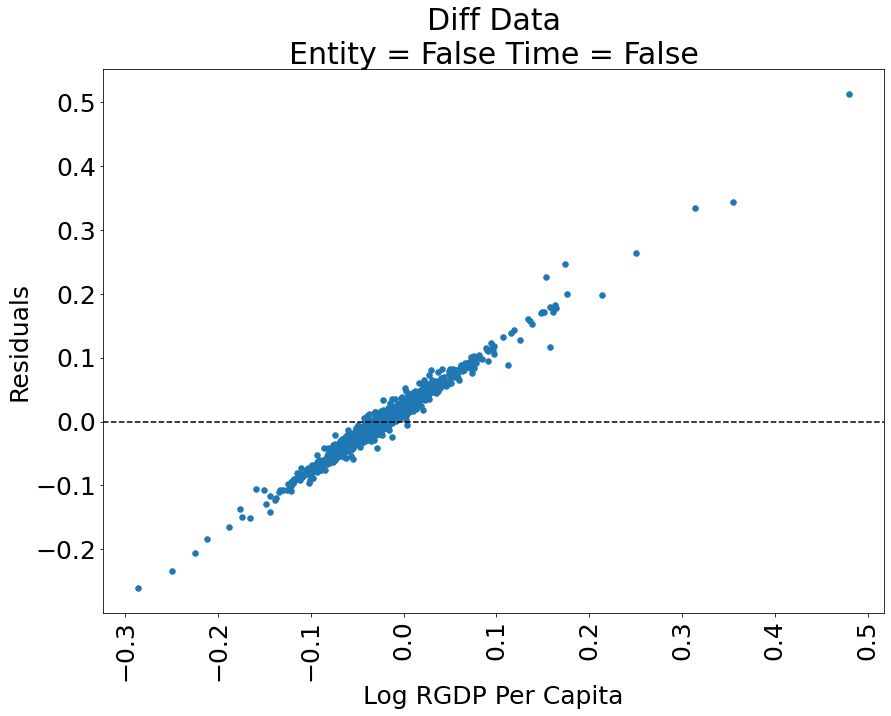

In [36]:
from linearmodels import PanelOLS
# . . . .
y_name = ["Log RGDP Per Capita"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Regulation"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
            X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.1217
Estimator:                   PanelOLS   R-squared (Between):              0.9613
No. Observations:                2031   R-squared (Within):               0.1976
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.9605
Time:                        08:51:39   Log-likelihood                   -530.58
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      51.613
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.537   Distribution:                  F(5,1863)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):            

<ipython-input-37-d471b132cb2e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-d471b132cb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


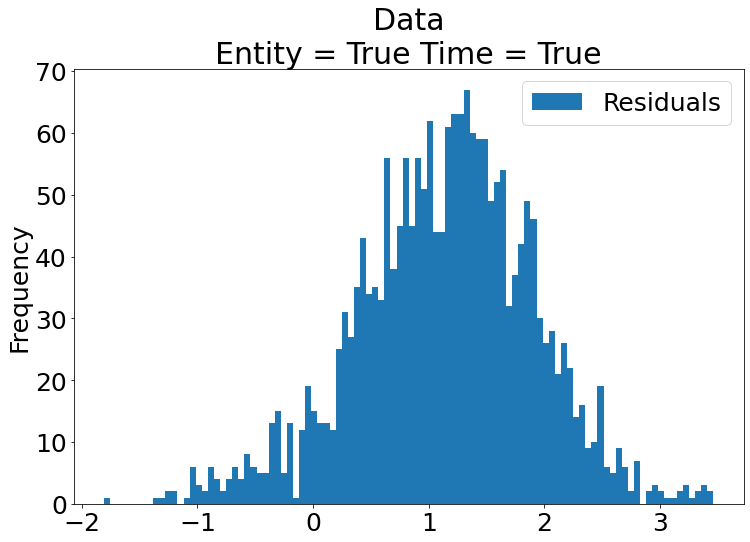

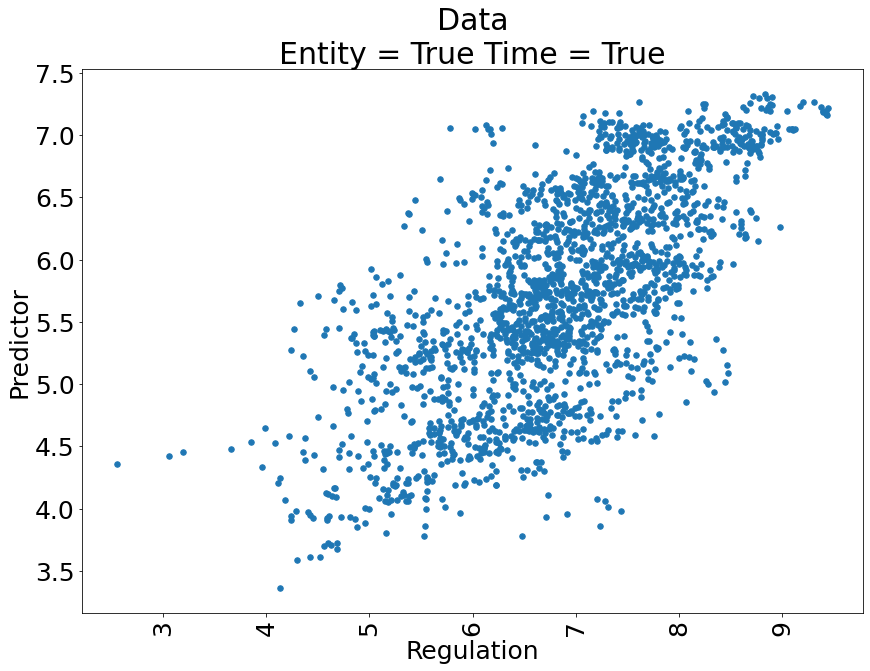

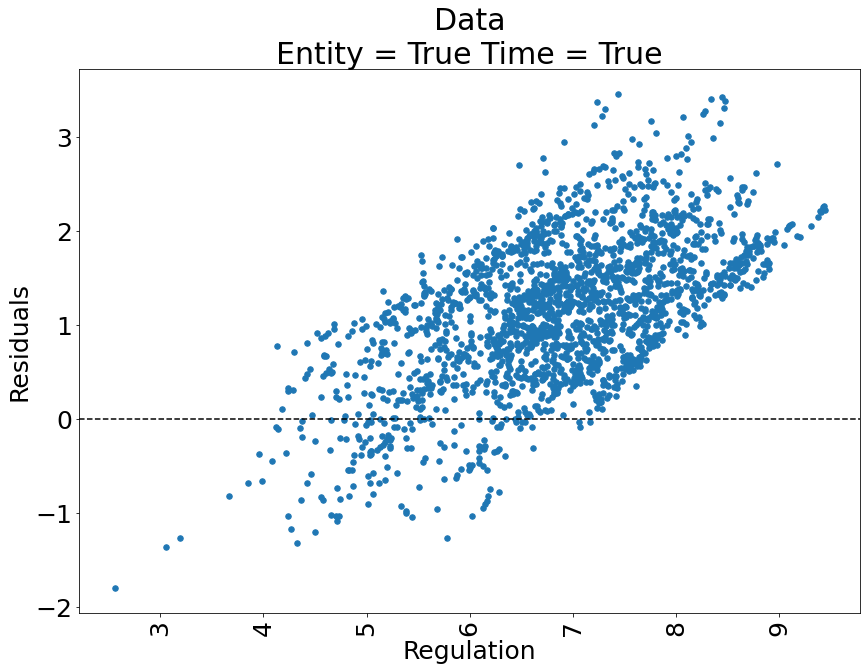

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.2347
Estimator:                   PanelOLS   R-squared (Between):              0.7534
No. Observations:                2031   R-squared (Within):               0.2347
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.7453
Time:                        08:51:41   Log-likelihood                   -627.86
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      115.10
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.537   Distribution:                  F(5,1877)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):           

<ipython-input-37-d471b132cb2e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-d471b132cb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


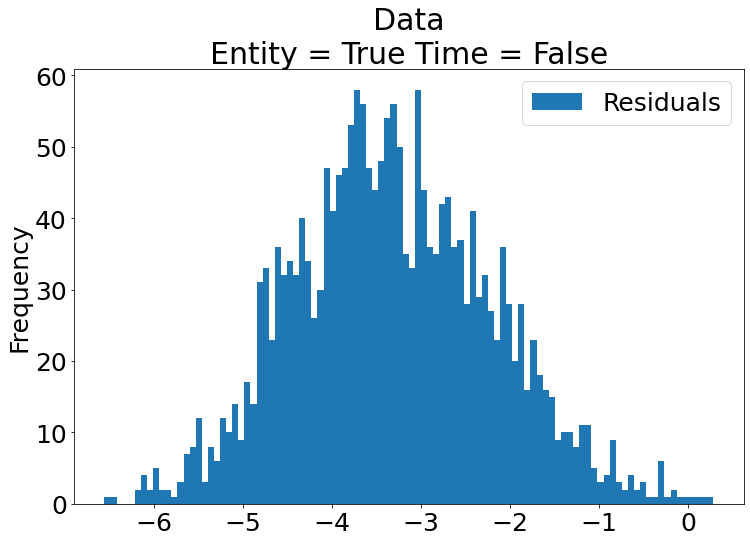

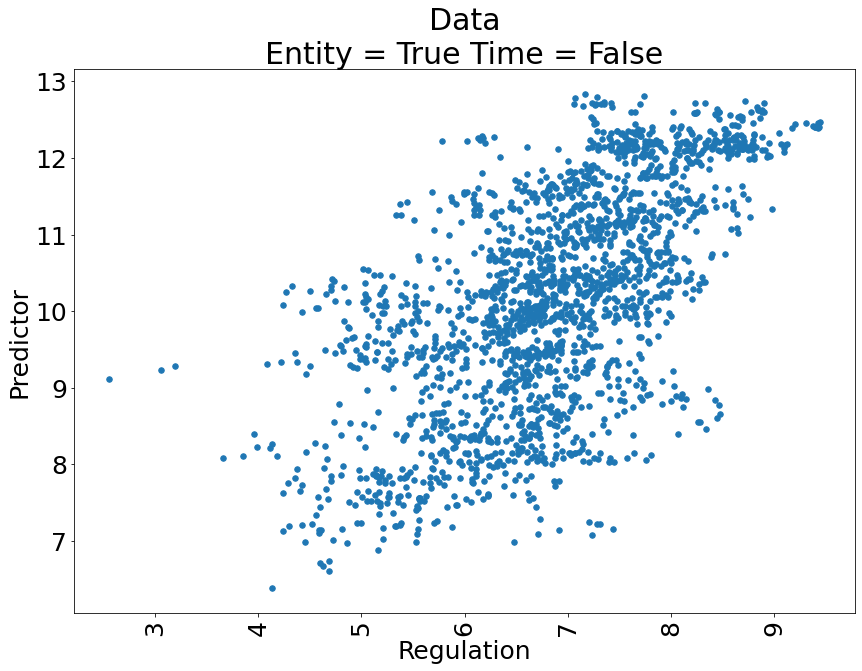

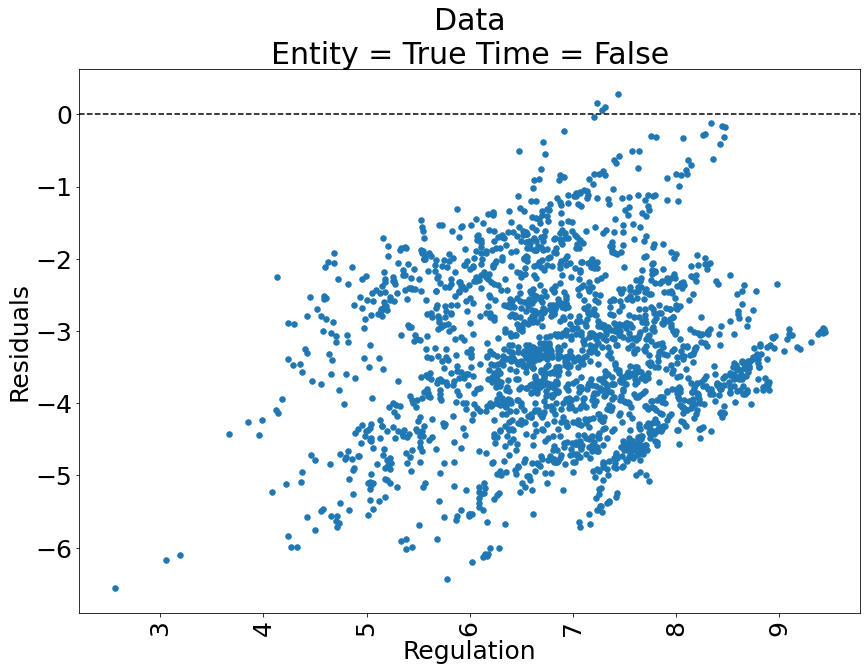

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.5338
Estimator:                   PanelOLS   R-squared (Between):              0.8489
No. Observations:                2031   R-squared (Within):               0.1187
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.8500
Time:                        08:51:42   Log-likelihood                   -2146.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      460.45
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.537   Distribution:                  F(5,2011)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):           

<ipython-input-37-d471b132cb2e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-d471b132cb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


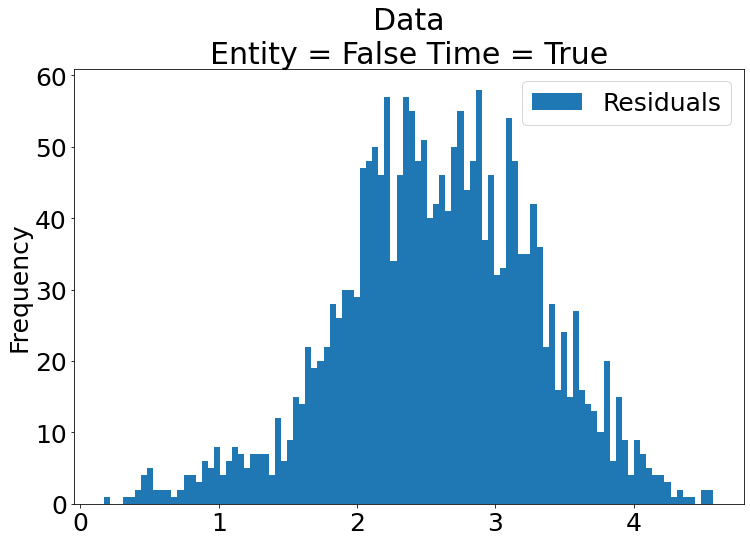

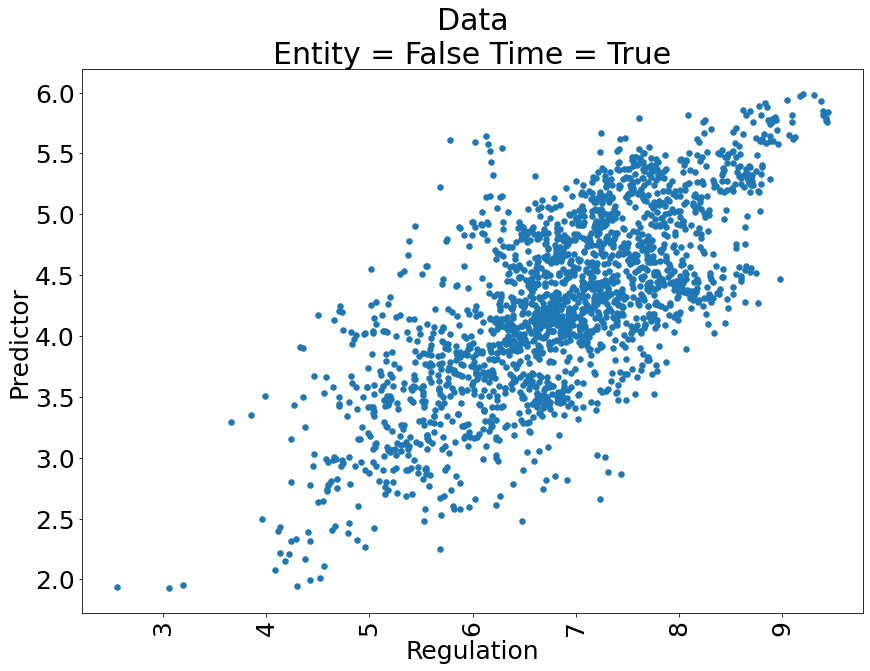

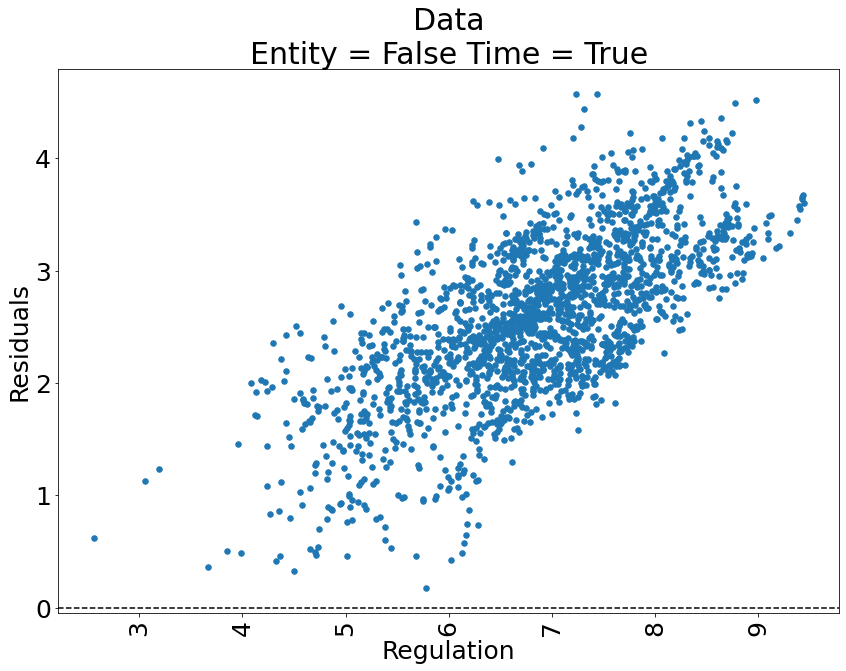

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.9883
Estimator:                   PanelOLS   R-squared (Between):              0.9905
No. Observations:                2031   R-squared (Within):               0.1248
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.9883
Time:                        08:51:43   Log-likelihood                   -2297.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   3.419e+04
Entities:                         162   P-value                           0.0000
Avg Obs:                       12.537   Distribution:                  F(5,2026)
Min Obs:                       0.0000                                           
Max Obs:                       15.000   F-statistic (robust):          

<ipython-input-37-d471b132cb2e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Predictor"] = results.predict()
<ipython-input-37-d471b132cb2e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])


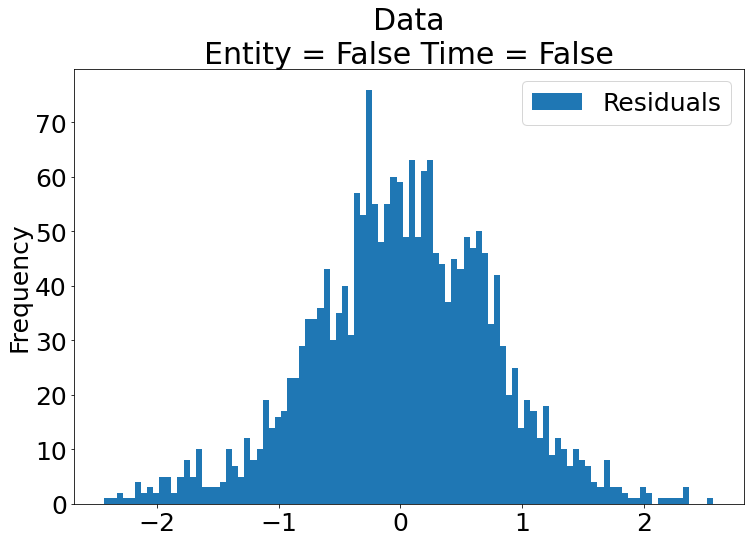

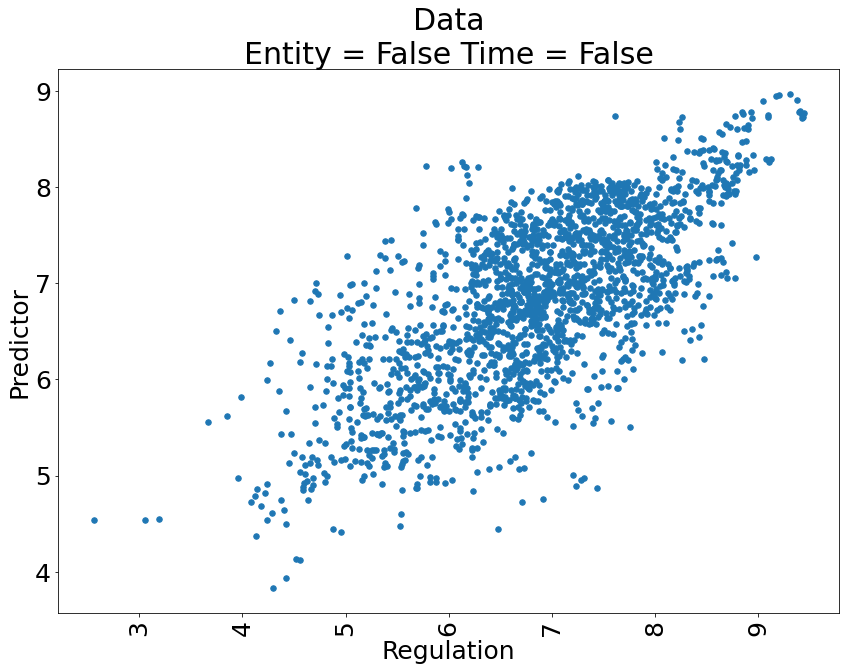

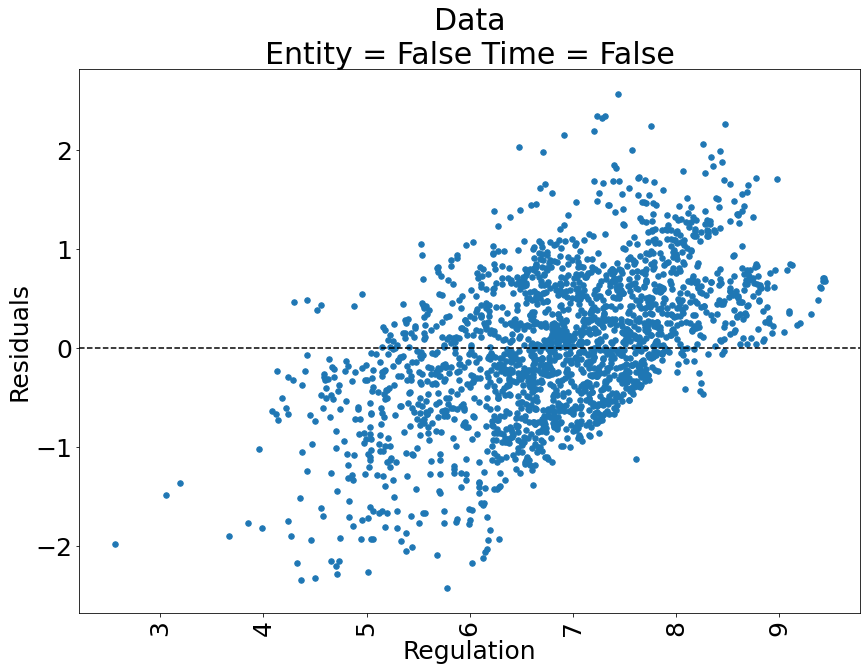

Diff Data
Entity = True
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0315
Estimator:                   PanelOLS   R-squared (Between):              0.0247
No. Observations:                1882   R-squared (Within):               0.0349
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.0444
Time:                        08:51:44   Log-likelihood                   -206.62
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.154
Entities:                         162   P-value                           0.0000
Avg Obs:                       11.617   Distribution:                  F(5,1715)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust):  

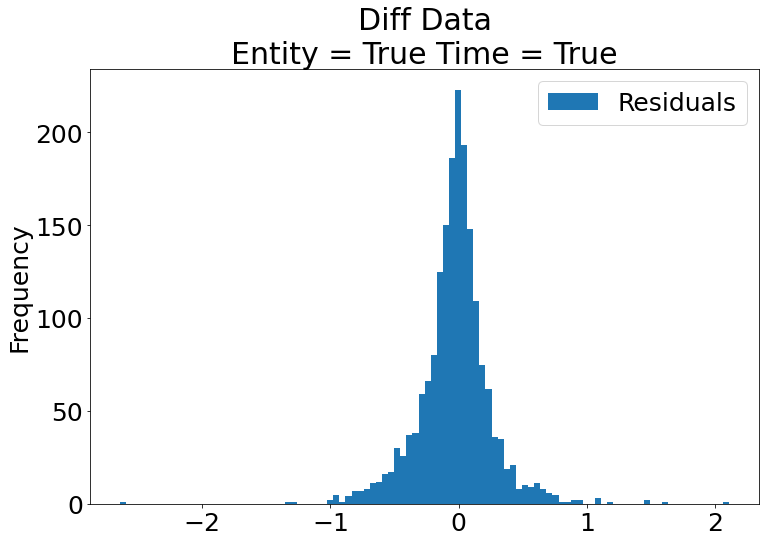

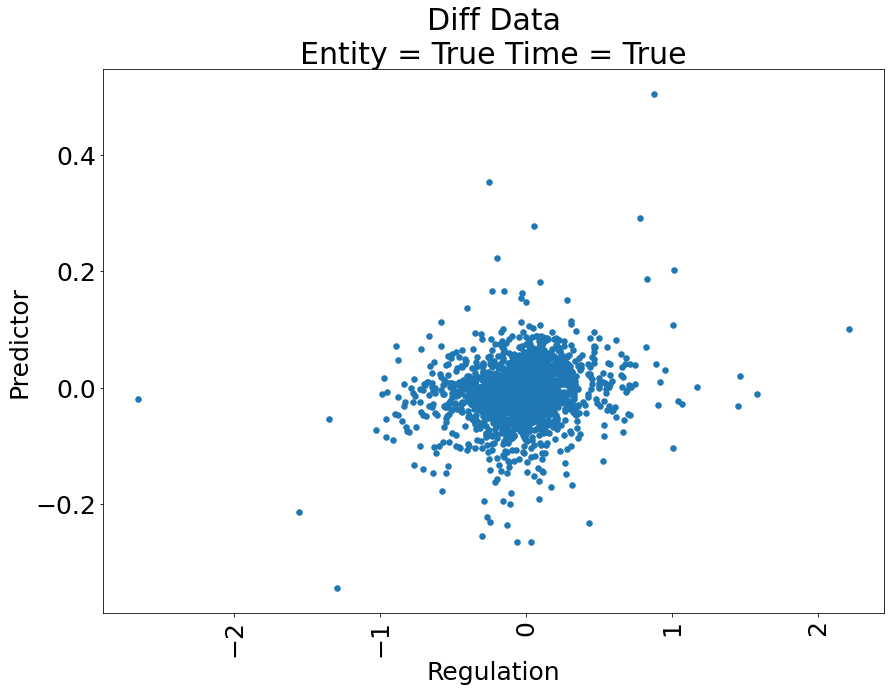

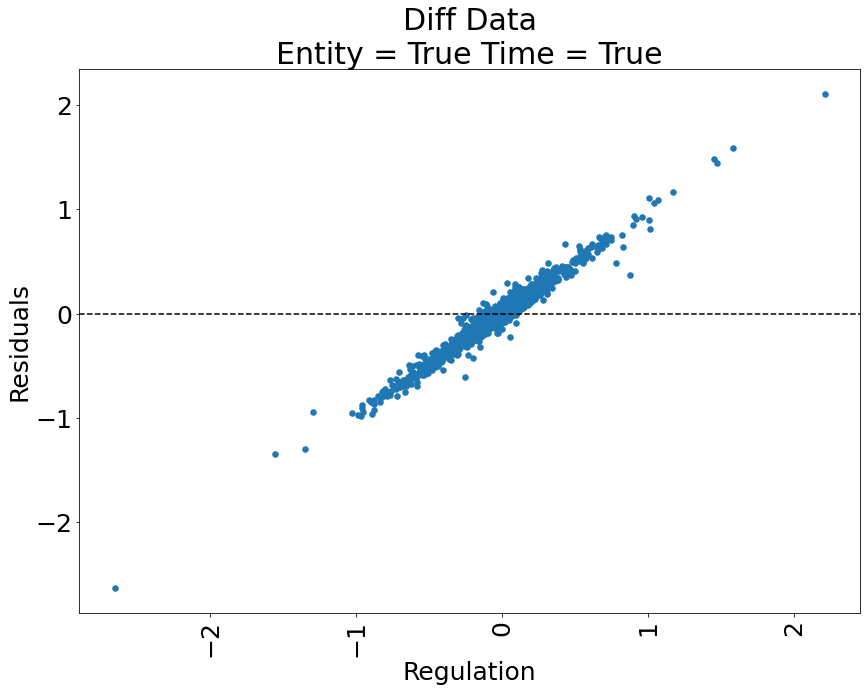

Diff Data
Entity = True
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0353
Estimator:                   PanelOLS   R-squared (Between):              0.0367
No. Observations:                1882   R-squared (Within):               0.0353
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.0462
Time:                        08:51:45   Log-likelihood                   -254.70
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.630
Entities:                         162   P-value                           0.0000
Avg Obs:                       11.617   Distribution:                  F(5,1728)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust): 

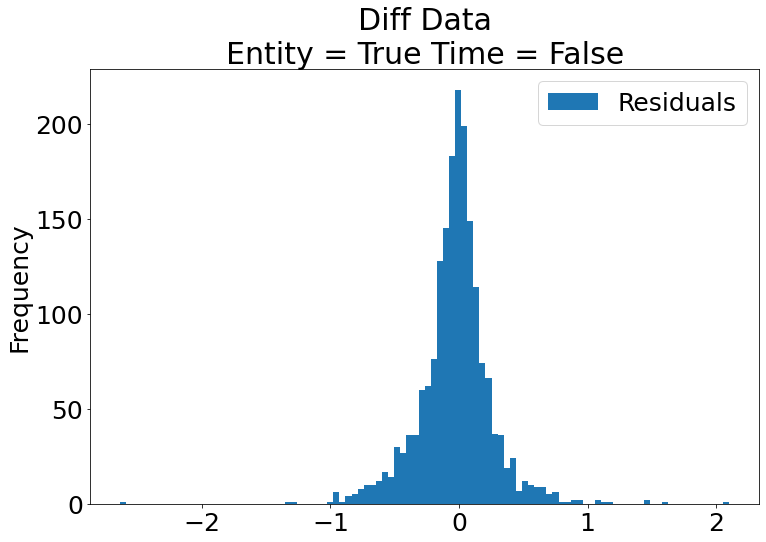

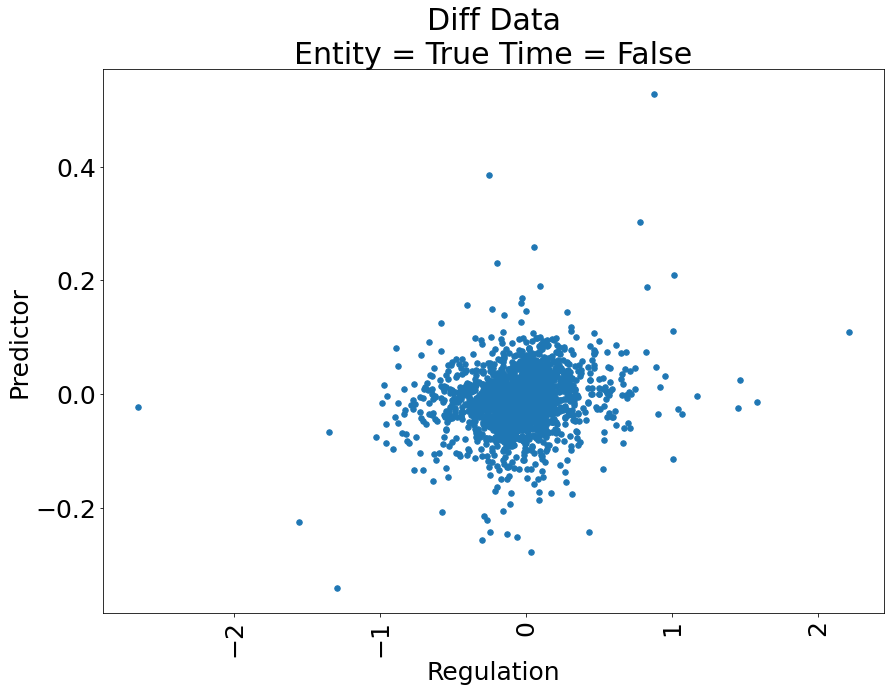

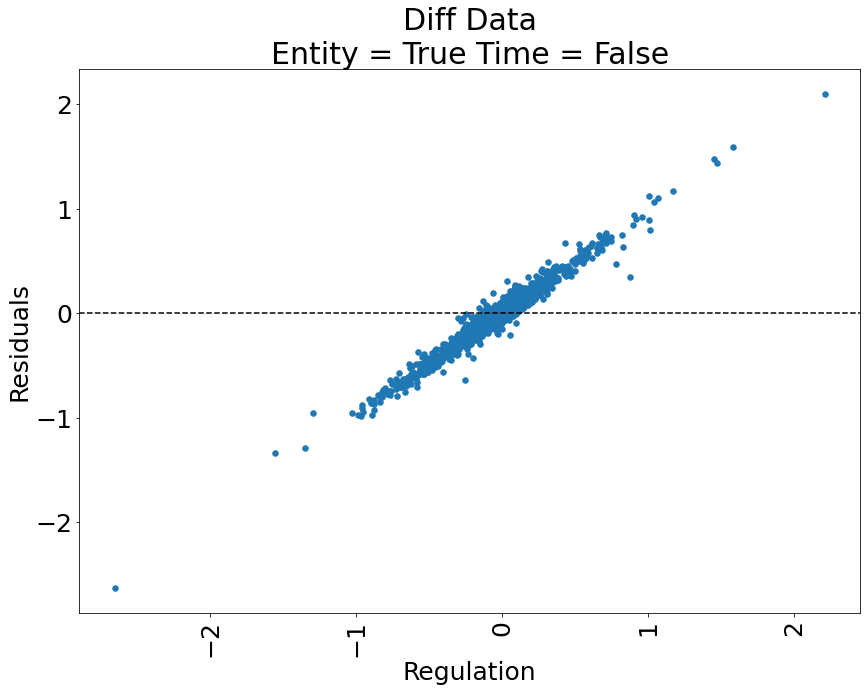

Diff Data
Entity = False
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0367
Estimator:                   PanelOLS   R-squared (Between):              0.0408
No. Observations:                1882   R-squared (Within):               0.0348
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.0476
Time:                        08:51:46   Log-likelihood                   -256.85
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.181
Entities:                         162   P-value                           0.0000
Avg Obs:                       11.617   Distribution:                  F(5,1863)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust): 

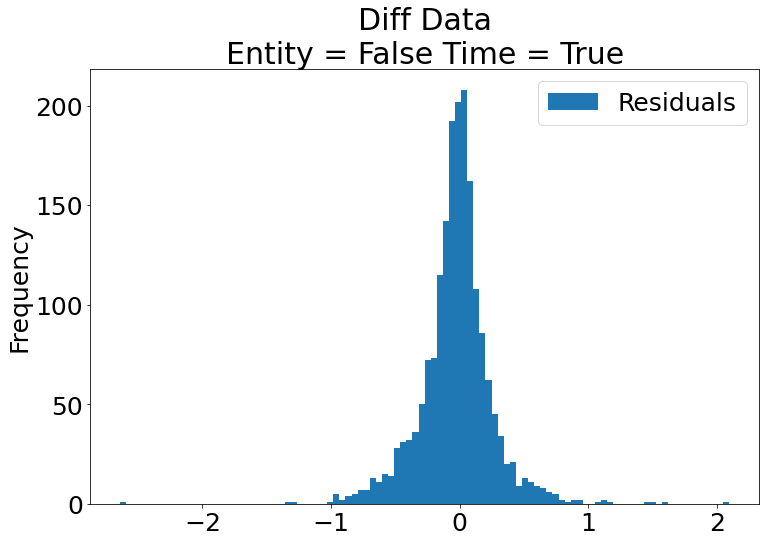

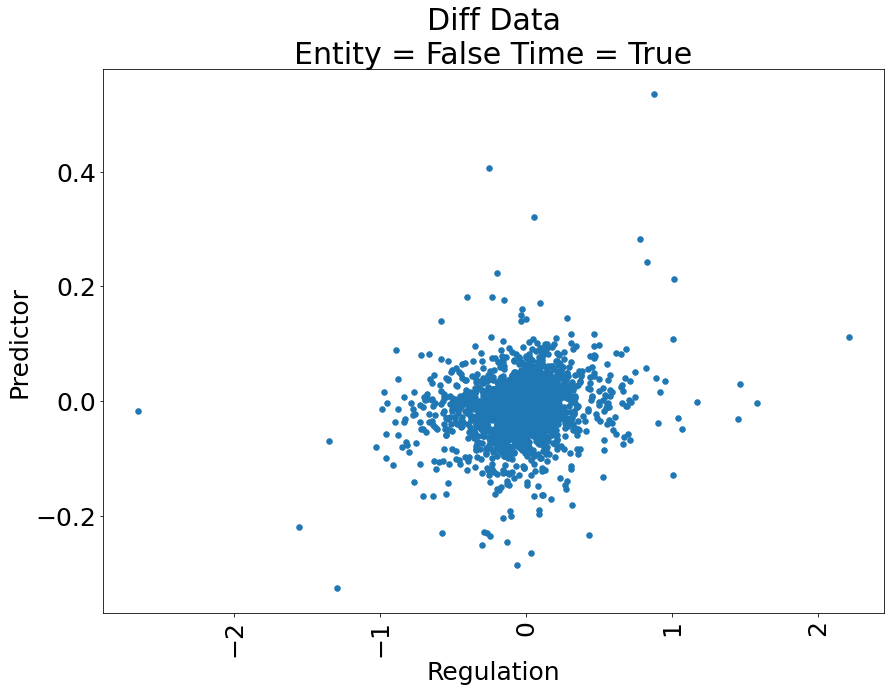

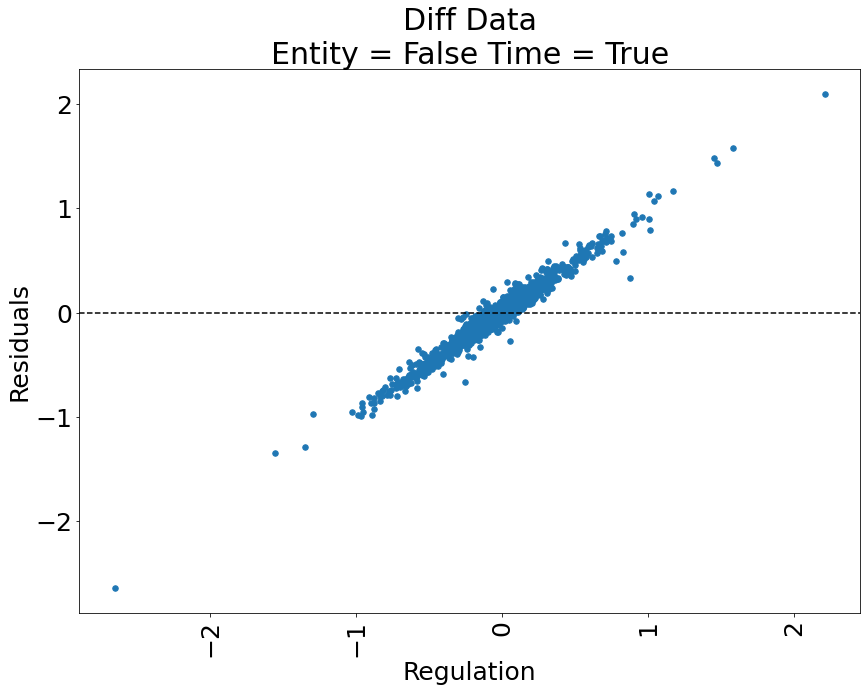

Diff Data
Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:             Regulation   R-squared:                        0.0502
Estimator:                   PanelOLS   R-squared (Between):              0.0735
No. Observations:                1882   R-squared (Within):               0.0327
Date:                Tue, Nov 09 2021   R-squared (Overall):              0.0502
Time:                        08:51:47   Log-likelihood                   -312.48
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      19.832
Entities:                         162   P-value                           0.0000
Avg Obs:                       11.617   Distribution:                  F(5,1877)
Min Obs:                       0.0000                                           
Max Obs:                       14.000   F-statistic (robust):

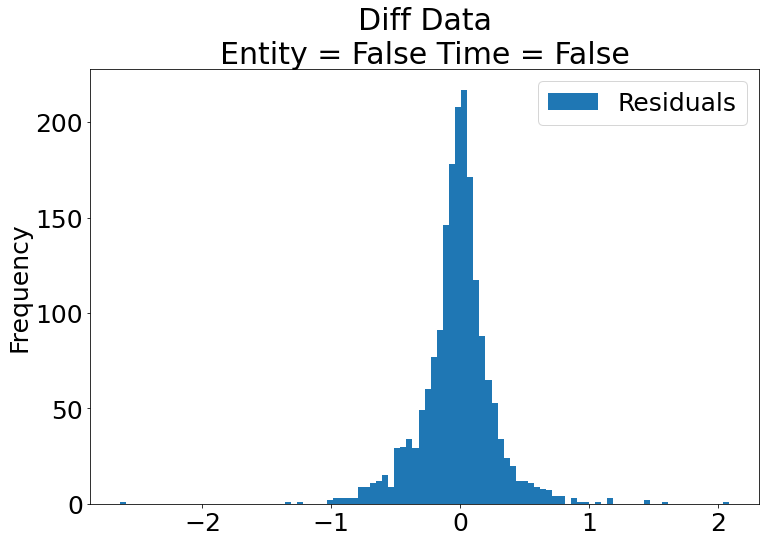

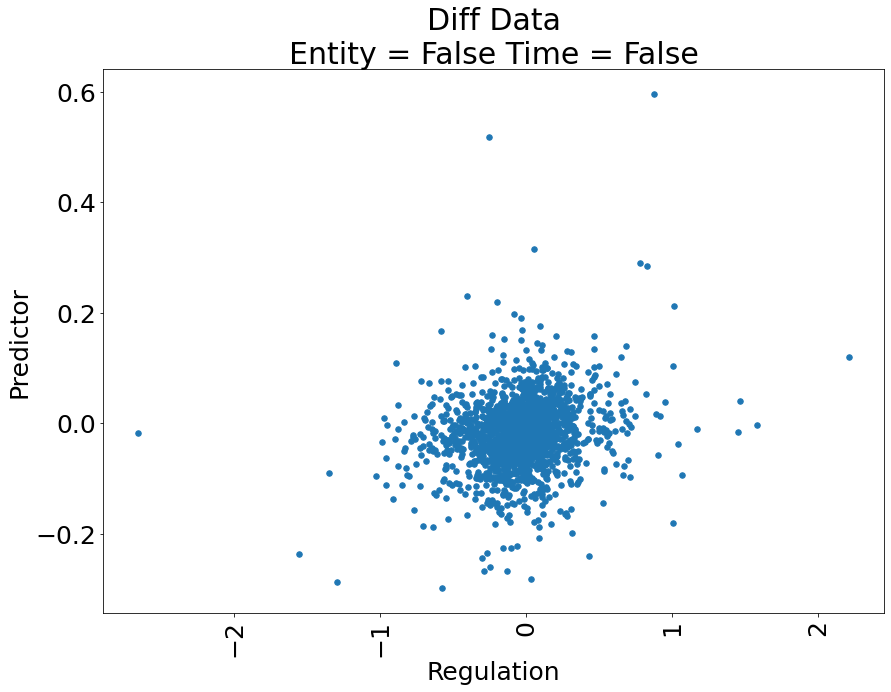

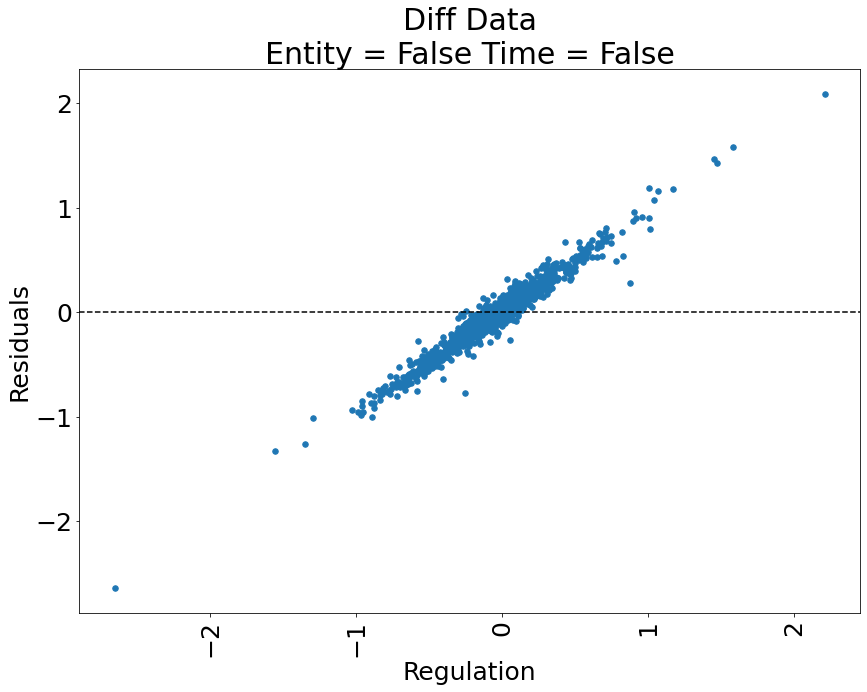

In [37]:
from linearmodels import PanelOLS
# . . . .
y_name = ["Regulation"]
X_names = ["Size of Government", 
          "Legal System & Property Rights", 
          "Sound Money",
          "Freedom to trade internationally",
          "Log RGDP Per Capita"]
for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()
            Y = reg_data[y_name]
            X = reg_data[X_names]
#             X["Constant"] = 1
            # call panel_regression method        
            model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)
            print(key, results, sep ="\n") 
            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            # plot distribution of residuals
            fig, ax = plt.subplots(figsize = (12,8))
            reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )

            # plot observed vs. predicted values
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Predictor", 
                              s = 30, ax = ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()

            # plot observed against residuals
            fig, ax = plt.subplots(figsize = (14,10))
            reg_data.plot.scatter(x = y_name[0],
                             y = "Residuals", 
                              s = 30, ax = ax)
            ax.axhline(0, ls = "--", color = "k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time) )
            plt.show()
            plt.close()